In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import qcodes as qc
import qcodes.instrument_drivers.nplab_drivers as npd

In [2]:
npd.triton_init('lockin865', 'lockin830', 'srframe')

Connected to: OXFORD INSTRUMENTS Triton (serial:N/A, firmware:2.449) in 0.33s
Connected to: Stanford_Research_Systems SR865A (serial:003538, firmware:V1.51) in 0.42s
Connected to: Stanford_Research_Systems SR830 (serial:s/n49840, firmware:ver1.07) in 0.04s
Connected to: Stanford_Research_Systems SIM900 (serial:s/n152150, firmware:ver3.6) in 0.75s


In [3]:
triton.MC_temp()

0.0285971

In [4]:
srframe.volt_p1()

0.0

In [5]:
srframe.volt_p5()

0.0

In [3]:
srframe.volt_p1.step = 0.08
srframe.volt_p1.inter_delay = 0.1
srframe.volt_p5.step = 0.08
srframe.volt_p5.inter_delay = 0.1

In [7]:
srframe.volt_p1(4)

In [14]:
srframe.volt_p1()

0.0

In [13]:
srframe.volt_p1(0)

In [10]:
srframe.volt_p1(-10)

# M05 device

Current 24-14. Measuring voltage on 21-20 (the apparently smaller angle we saw in the PPMS)

In [11]:
# just get a well-resolved gate sweep from the start since we're already interested in these electrodes
gvals = np.linspace(-10, 10, 401)
data1, plot1 = npd.single_param_sweep(srframe.volt_p1, gvals, 2.2, lockin865.X, lockin865.Y, DataName='M05_21-20_basetemp_0T')

Started at 2019-10-04 10:37:21
DataSet:
   location = 'data/2019-10-04/#001_M05_21-20_basetemp_0T_10-37-18'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin865_X         | X            | (401,)
   Measured | lockin865_Y         | Y            | (401,)
Finished at 2019-10-04 10:52:49


In [12]:
gvals = np.linspace(10, 14, 81)
data2, plot2 = npd.single_param_sweep(srframe.volt_p1, gvals, 2.2, lockin865.X, lockin865.Y, DataName='M05_21-20_basetemp_0T')

Started at 2019-10-04 10:54:01
DataSet:
   location = 'data/2019-10-04/#002_M05_21-20_basetemp_0T_10-54-00'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (81,)
   Measured | lockin865_X         | X            | (81,)
   Measured | lockin865_Y         | Y            | (81,)
Finished at 2019-10-04 10:57:08


In [16]:
g2120 = np.concatenate((data1.srframe_volt_p1_set[:], data2.srframe_volt_p1_set[:]))
R2120 = np.concatenate((data1.lockin865_X[:], data2.lockin865_X[:]))/1e-9 # I think this was actually 5 nA, not 1

In [14]:
gvals = np.linspace(-15, 15, 151)
data3, plot3 = npd.single_param_sweep(srframe.volt_p1, gvals, 2.2, lockin865.X, lockin865.Y, DataName='M05_19-16_basetemp_0T')
srframe.volt_p1(0)

Started at 2019-10-04 11:01:53
DataSet:
   location = 'data/2019-10-04/#003_M05_19-16_basetemp_0T_11-01-52'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (151,)
   Measured | lockin865_X         | X            | (151,)
   Measured | lockin865_Y         | Y            | (151,)
Finished at 2019-10-04 11:08:58


In [17]:
g1916 = data3.srframe_volt_p1_set[:]
R1916 = data3.lockin865_X[:]/1e-9 # I think this was actually 5 nA, not 1

In [15]:
gvals = np.linspace(-15, 15, 301)  # I think this was actually 5 nA, not 1
data4, plot4 = npd.single_param_sweep(srframe.volt_p1, gvals, 2.2, lockin865.X, lockin865.Y, DataName='M05_20-19_basetemp_0T')
srframe.volt_p1(0)

Started at 2019-10-04 11:10:45
DataSet:
   location = 'data/2019-10-04/#004_M05_20-19_basetemp_0T_11-10-44'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
Finished at 2019-10-04 11:23:37


In [22]:
g2019 = data4.srframe_volt_p1_set[:]
R2019 = data4.lockin865_X[:]/1e-9 # I think this was actually 5 nA, not 1

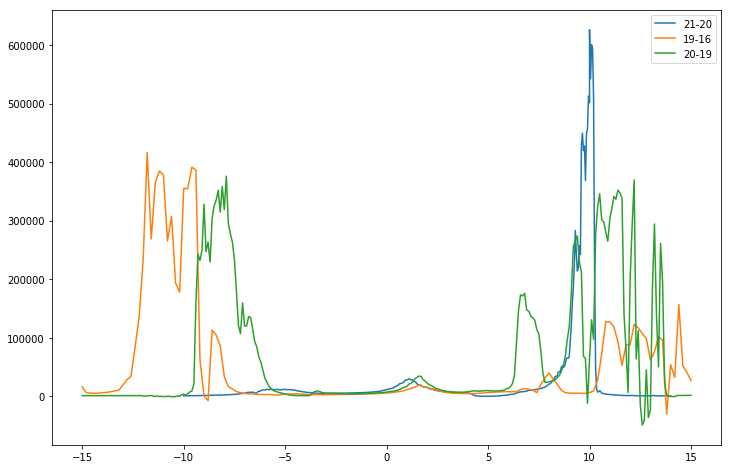

In [24]:
plt.figure(figsize=(12,8))
plt.plot(g2120, R2120, label='21-20') # I think this was actually 5 nA, not 1
plt.plot(g1916, R1916, label='19-16')
plt.plot(g2019, R2019, label='20-19')
plt.legend()

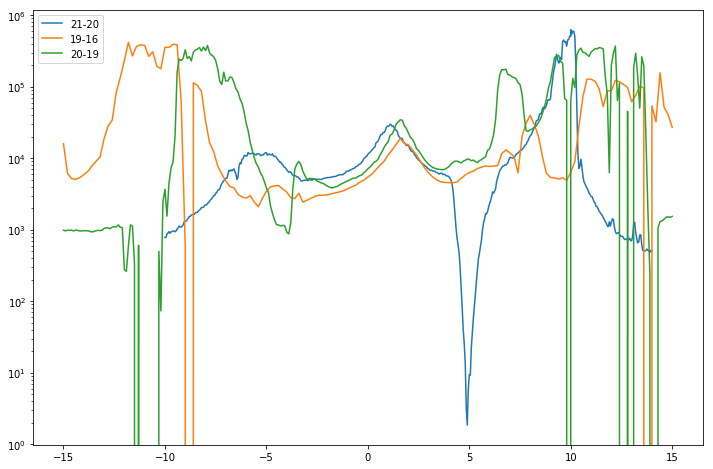

In [25]:
plt.figure(figsize=(12,8))
plt.semilogy(g2120, R2120, label='21-20')
plt.semilogy(g1916, R1916, label='19-16')
plt.semilogy(g2019, R2019, label='20-19')
plt.legend()

# M08 device

Current 41-42

In [26]:
gvals = np.linspace(-15, 15, 301)
data5, plot5 = npd.single_param_sweep(srframe.volt_p1, gvals, 2.2, lockin865.X, lockin865.Y, DataName='M08_39-38_basetemp_0T')
srframe.volt_p1(0)

Started at 2019-10-04 11:33:53
DataSet:
   location = 'data/2019-10-04/#005_M08_39-38_basetemp_0T_11-33-52'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
Finished at 2019-10-04 11:46:45


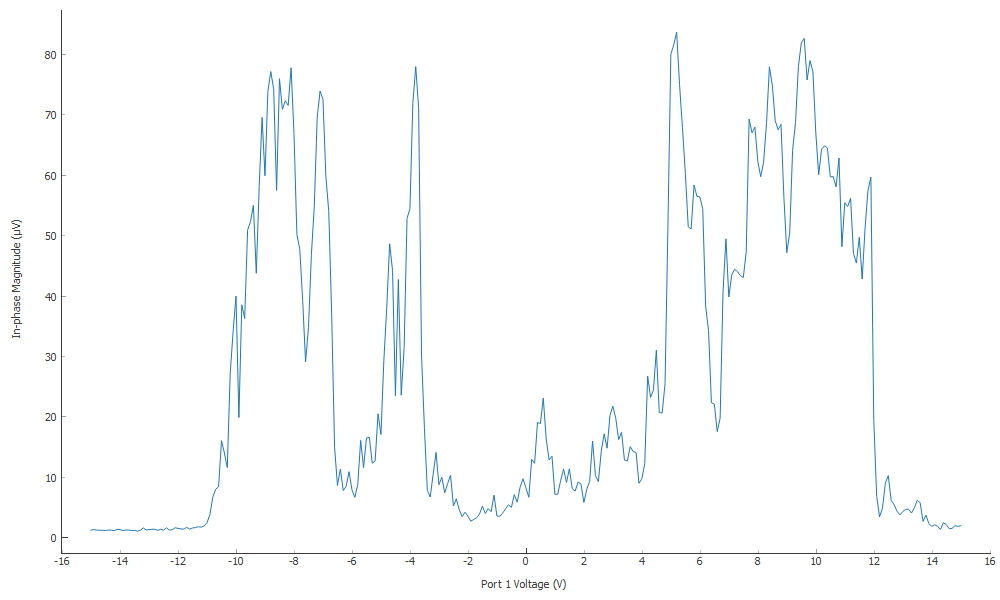

In [28]:
plot5[0]

In [27]:
gvals = np.linspace(-15, 15, 301)  # gate wasn't on
data6, plot6 = npd.single_param_sweep(srframe.volt_p1, gvals, 2.2, lockin865.X, lockin865.Y, DataName='M08_44-46_basetemp_0T')
srframe.volt_p1(0)

Started at 2019-10-04 11:51:43
DataSet:
   location = 'data/2019-10-04/#006_M08_44-46_basetemp_0T_11-51-43'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
Finished at 2019-10-04 12:01:21
Keyboard Interrupt


# Back to M05

Contacts 21-20

In [40]:
srframe.volt_p5(0)

In [34]:
offvals = np.linspace(1000e-3, -1000e-3, 201)
data7, plot7 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.6, lockin865.X, lockin865.Y, DataName='M05_21-20B=-0mT_vbg=-4.7V_AC1nAdvdi_baseT')

Started at 2019-10-04 12:10:51
DataSet:
   location = 'data/2019-10-04/#009_M05_21-20B=-0mT_vbg=-4.7V_AC1nAdvdi_baseT_12-10-50'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2019-10-04 12:16:36


In [35]:
offvals = np.linspace(2000e-3, -2000e-3, 201)
data8, plot8 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.6, lockin865.X, lockin865.Y, DataName='M05_21-20B=-0mT_vbg=-4.7V_AC1nAdvdi_baseT')

Started at 2019-10-04 12:17:26
DataSet:
   location = 'data/2019-10-04/#010_M05_21-20B=-0mT_vbg=-4.7V_AC1nAdvdi_baseT_12-17-26'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2019-10-04 12:23:27


## From here on, most measurements are at 0.5 nA

In [37]:
offvals = np.linspace(5000e-3, -5000e-3, 201)
data9, plot9 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.6, lockin865.X, lockin865.Y, DataName='M05_21-20B=-0mT_vbg=-4.7V_AC0.5nAdvdi_baseT')

Started at 2019-10-04 12:29:00
DataSet:
   location = 'data/2019-10-04/#012_M05_21-20B=-0mT_vbg=-4.7V_AC0.5nAdvdi_baseT_12-28-59'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2019-10-04 12:34:56


In [39]:
offvals = np.linspace(10000e-3, -10000e-3, 201)
data10, plot10 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.6, lockin865.X, lockin865.Y, DataName='M05_21-20B=-0mT_vbg=-4.9V_AC0.5nAdvdi_baseT')

Started at 2019-10-04 12:35:13
DataSet:
   location = 'data/2019-10-04/#013_M05_21-20B=-0mT_vbg=-4.9V_AC0.5nAdvdi_baseT_12-35-12'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2019-10-04 12:41:57


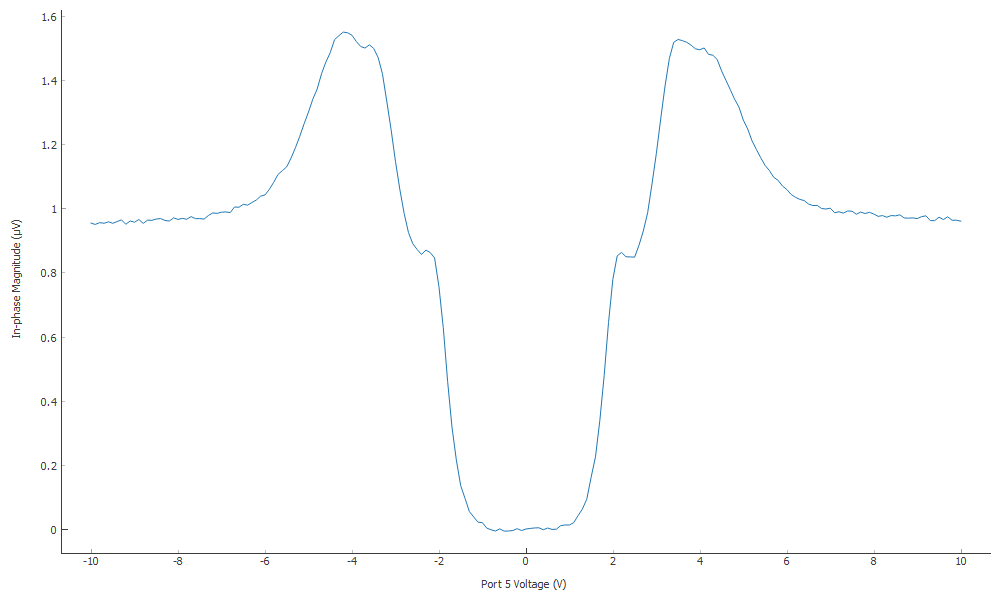

In [41]:
plot10[0]

In [42]:
offvals = np.linspace(10000e-3, -10000e-3, 201)
gvals = np.linspace(4, 7, 16)
data11, plot11 = npd.twod_param_sweep(srframe.volt_p1, gvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, SetDelay1=1, SetDelay2=1.1, DataName='M05_21-20_vbgsweep_AC0.5nAdvdi_baseT_b=-0mT')

Started at 2019-10-04 12:49:09
DataSet:
   location = 'data/2019-10-04/#014_M05_21-20_vbgsweep_AC0.5nAdvdi_baseT_b=-0mT_12-49-08'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (16,)
   Setpoint | srframe_volt_p5_set | volt_p5      | (16, 201)
   Measured | lockin865_X         | X            | (16, 201)
   Measured | lockin865_Y         | Y            | (16, 201)
Finished at 2019-10-04 14:10:28


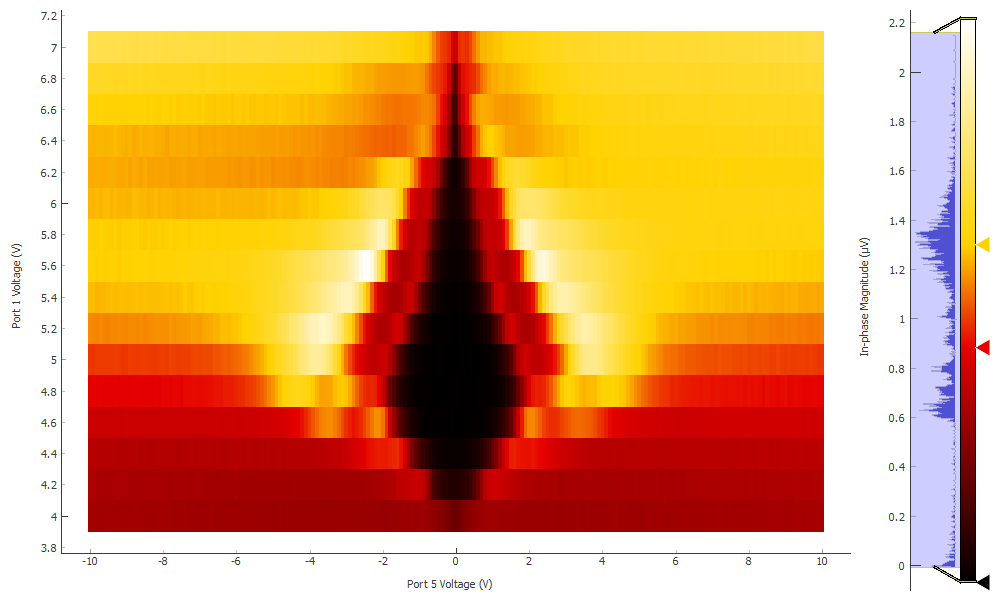

In [43]:
plot11[0]

In [44]:
srframe.volt_p1(5.2)

In [45]:
offvals = np.linspace(10000e-3, -10000e-3, 201)
data12, plot12 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.6, lockin865.X, lockin865.Y, DataName='M05_21-20B=-0mT_vbg=-5.2V_AC0.5nAdvdi_baseT')

Started at 2019-10-04 14:11:56
DataSet:
   location = 'data/2019-10-04/#015_M05_21-20B=-0mT_vbg=-5.2V_AC0.5nAdvdi_baseT_14-11-55'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2019-10-04 14:18:50


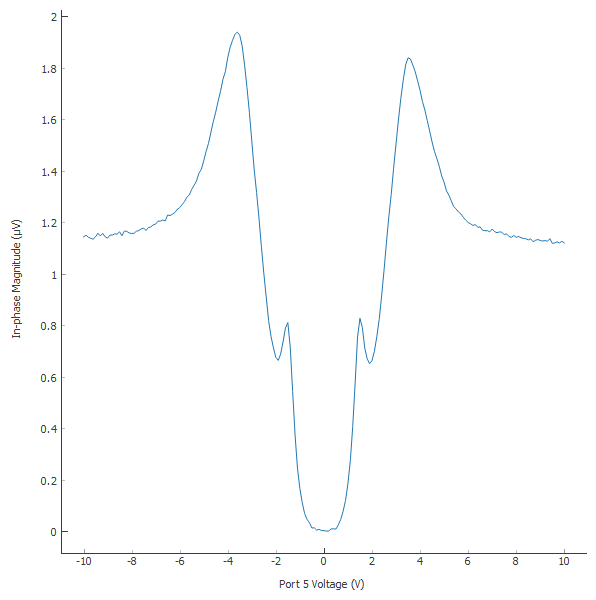

In [46]:
plot12[0]

In [47]:
srframe.volt_p1(0)

In [48]:
srframe.volt_p5(0)

In [49]:
gvals = np.linspace(-15, 15, 301) 
data13, plot13 = npd.single_param_sweep(srframe.volt_p1, gvals, 2, lockin865.X, lockin865.Y, DataName='M05_20-19_basetemp_0T')
srframe.volt_p1(0)

Started at 2019-10-04 14:23:32
DataSet:
   location = 'data/2019-10-04/#016_M05_20-19_basetemp_0T_14-23-31'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
Finished at 2019-10-04 14:35:23


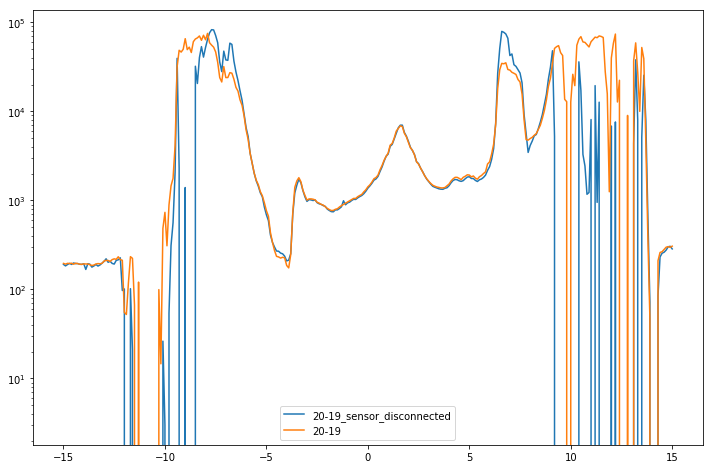

In [51]:
g2019_2 = data13.srframe_volt_p1_set[:]
R2019_2 = data13.lockin865_X[:]/0.5e-9
plt.figure(figsize=(12,8))
plt.semilogy(g2019_2, R2019_2, label='20-19_sensor_disconnected')
plt.semilogy(g2019, R2019/5, label='20-19')
plt.legend()

# M08 again. This time current running 43-42

In [52]:
gvals = np.linspace(-15, 15, 151) 
data14, plot14 = npd.single_param_sweep(srframe.volt_p1, gvals, 2, lockin865.X, lockin865.Y, DataName='M08_44-46_basetemp_0T')
srframe.volt_p1(0)

Started at 2019-10-04 14:44:07
DataSet:
   location = 'data/2019-10-04/#017_M08_44-46_basetemp_0T_14-44-06'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (151,)
   Measured | lockin865_X         | X            | (151,)
   Measured | lockin865_Y         | Y            | (151,)
Finished at 2019-10-04 14:50:42


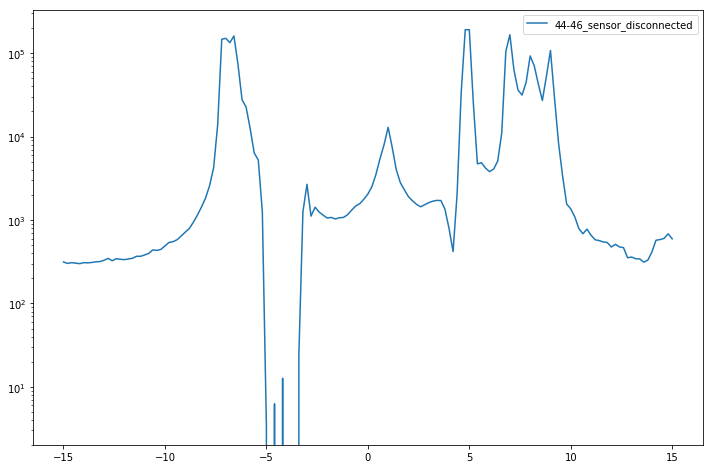

In [53]:
g44_46 = data14.srframe_volt_p1_set[:]
R44_46 = data14.lockin865_X[:]/0.5e-9
plt.figure(figsize=(12,8))
plt.semilogy(g44_46, R44_46, label='44-46_sensor_disconnected')
plt.legend()

In [56]:
srframe.volt_p1(-4.7)

In [57]:
gvals = np.linspace(-15, 15, 151) 
data14, plot14 = npd.single_param_sweep(srframe.volt_p1, gvals, 2, lockin865.X, lockin865.Y, DataName='M08_46-47_basetemp_0T')
srframe.volt_p1(0)

Started at 2019-10-04 14:58:10
DataSet:
   location = 'data/2019-10-04/#018_M08_46-47_basetemp_0T_14-58-09'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (151,)
   Measured | lockin865_X         | X            | (151,)
   Measured | lockin865_Y         | Y            | (151,)
Finished at 2019-10-04 15:04:35


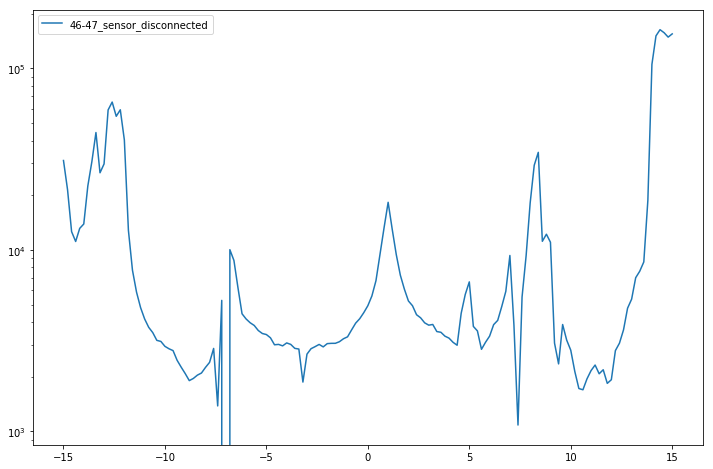

In [59]:
g46_47 = data14.srframe_volt_p1_set[:]
R46_47 = data14.lockin865_X[:]/0.5e-9
plt.figure(figsize=(12,8))
plt.semilogy(g46_47, R46_47, label='46-47_sensor_disconnected')
plt.legend()

In [62]:
# looking at 44-46 again, at -4Vbg
srframe.volt_p1(-5)

In [65]:
# I don't think 45 and 47 were disconnected last time. Try again just to make sure
gvals = np.linspace(-15, 15, 151) 
data16, plot16 = npd.single_param_sweep(srframe.volt_p1, gvals, 2, lockin865.X, lockin865.Y, DataName='M08_44-46_basetemp_0T')
srframe.volt_p1(0)

Started at 2019-10-04 15:30:42
DataSet:
   location = 'data/2019-10-04/#020_M08_44-46_basetemp_0T_15-30-41'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (151,)
   Measured | lockin865_X         | X            | (151,)
   Measured | lockin865_Y         | Y            | (151,)
Finished at 2019-10-04 15:37:16


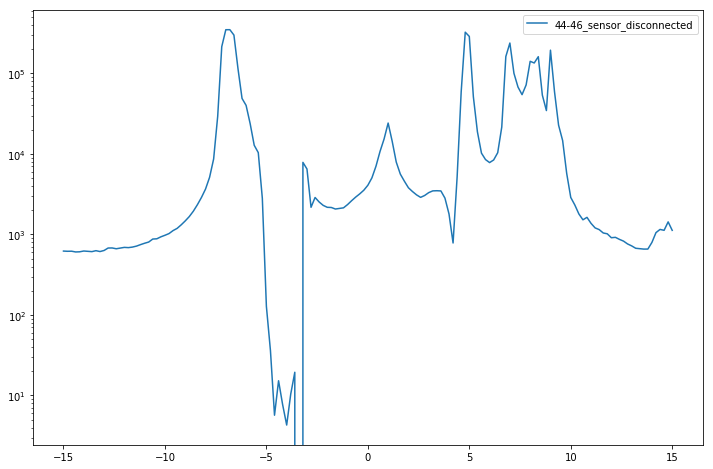

In [67]:
g44_46 = data16.srframe_volt_p1_set[:]
R44_46 = data16.lockin865_X[:]/0.5e-9
plt.figure(figsize=(12,8))
plt.semilogy(g44_46, R44_46, label='44-46_sensor_disconnected')
plt.legend()

In [68]:
srframe.volt_p1(-4)

In [71]:
offvals = np.linspace(-10, 10, 201)
data17, plot17 = npd.single_param_sweep(srframe.volt_p5, offvals, 2, lockin865.X, lockin865.Y, DataName='M08_44-46_basetemp_0T_dvdi')

Started at 2019-10-04 15:41:52
DataSet:
   location = 'data/2019-10-04/#021_M08_44-46_basetemp_0T_dvdi_15-41-51'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2019-10-04 15:49:47


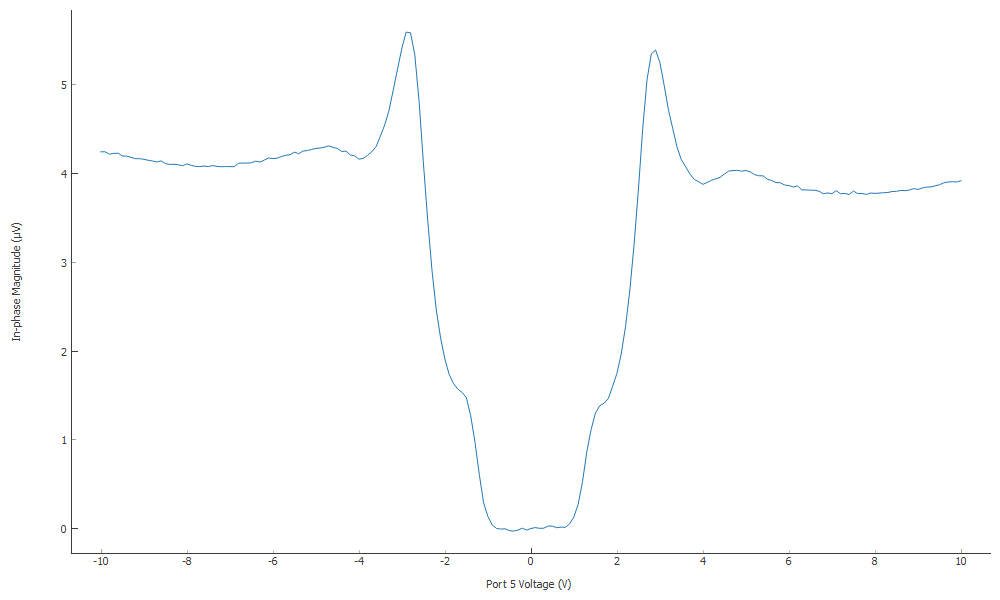

In [72]:
plot17[0]

Find the optimal magnetic field

In [80]:
srframe.volt_p5(2.4)

In [88]:
lockin865.X()

3.192137001e-06

In [44]:
triton.magnet_sweeprate(0.2)

In [20]:
triton.magnet_swh(1)

Wait 5 min for the switch to warm


KeyboardInterrupt: 

In [39]:
triton.field()

0.000699

In [94]:
triton.field(0.003)
data18, plot18 = npd.data_log(1, triton.field, lockin865.X, lockin865.Y, minutes=8, breakif=npd.breakat(triton.field, 0.003, 0.0005, waitafter=20), DataName='fieldsweep', XParam=triton.field, YParam=lockin865.X)

Sweep time approximately 371.302 seconds
Started at 2019-10-04 16:00:30
DataSet:
   location = 'data/2019-10-04/#022_fieldsweep_16-00-30'
   <Type>   | <array_id>   | <array.name> | <array.shape>
   Setpoint | count_set    | count        | (480,)
   Measured | time0        | time0        | (480,)
   Measured | triton_field | field        | (480,)
   Measured | lockin865_X  | X            | (480,)
   Measured | lockin865_Y  | Y            | (480,)
Finished at 2019-10-04 16:06:15


In [95]:
triton.field(0.0007)
data19, plot19 = npd.data_log(1, triton.field, lockin865.X, lockin865.Y, minutes=4, breakif=npd.breakat(triton.field, 0.0007, 0.0002, waitafter=10), DataName='fieldsweep', XParam=triton.field, YParam=lockin865.X)

Sweep time approximately 148.066 seconds
Started at 2019-10-04 16:07:27
DataSet:
   location = 'data/2019-10-04/#023_fieldsweep_16-07-27'
   <Type>   | <array_id>   | <array.name> | <array.shape>
   Setpoint | count_set    | count        | (240,)
   Measured | time0        | time0        | (240,)
   Measured | triton_field | field        | (240,)
   Measured | lockin865_X  | X            | (240,)
   Measured | lockin865_Y  | Y            | (240,)
Finished at 2019-10-04 16:09:42


## Turn the switch heater off, make the magnet persistent at 0.7 mT. Then unplug the magnet and the ground connection to the scanner box

In [40]:
triton.magnet_swh(1)

Wait 5 min for the switch to warm


KeyboardInterrupt: 

In [97]:
offvals = np.linspace(-10, 10, 201)  # run this one more time to see if it improves.
data20, plot20 = npd.single_param_sweep(srframe.volt_p5, offvals, 1, lockin865.X, lockin865.Y, DataName='M08_44-46_basetemp_0T_dvdi')

Started at 2019-10-04 16:17:10
DataSet:
   location = 'data/2019-10-04/#024_M08_44-46_basetemp_0T_dvdi_16-17-10'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2019-10-04 16:21:49


Trying other contacts again

In [98]:
srframe.volt_p5(0)

In [99]:
gvals = np.linspace(-15, 15, 151)  # redo of 46-47 since 47 was shorted to ground last time
data21, plot21 = npd.single_param_sweep(srframe.volt_p1, gvals, 2, lockin865.X, lockin865.Y, DataName='M08_46-47_basetemp_0T')
srframe.volt_p1(0)

Started at 2019-10-04 16:25:10
DataSet:
   location = 'data/2019-10-04/#025_M08_46-47_basetemp_0T_16-25-09'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (151,)
   Measured | lockin865_X         | X            | (151,)
   Measured | lockin865_Y         | Y            | (151,)
Finished at 2019-10-04 16:31:37


In [100]:
gvals = np.linspace(-15, 15, 301)  # redo of 46-47 since 47 was shorted to ground last time
data21, plot21 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.25, lockin865.X, lockin865.Y, DataName='M08_46-47_basetemp_0T')
srframe.volt_p1(0)

Started at 2019-10-04 16:32:44
DataSet:
   location = 'data/2019-10-04/#026_M08_46-47_basetemp_0T_16-32-43'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
Finished at 2019-10-04 16:40:49


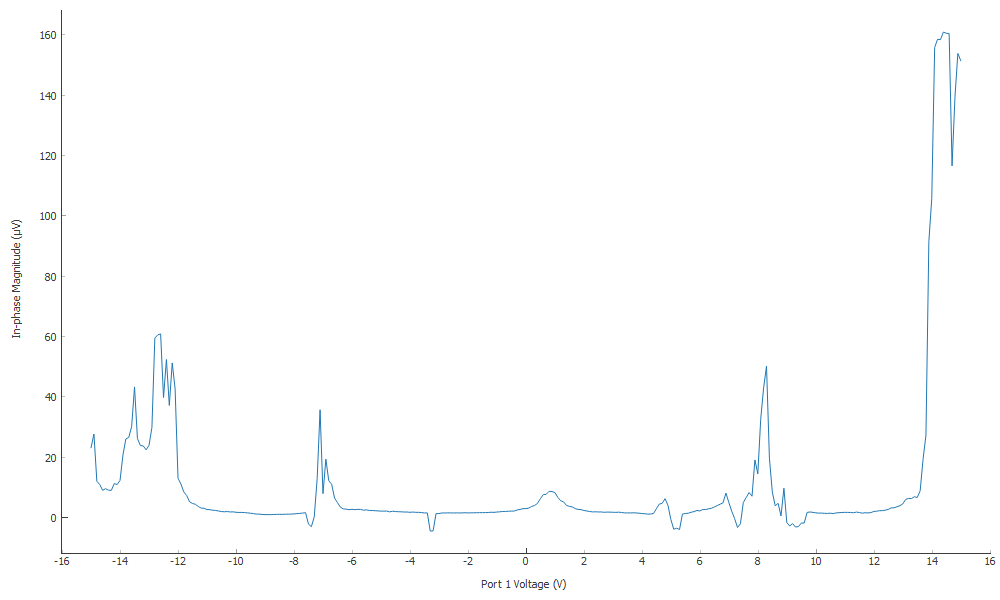

In [101]:
plot21[0]

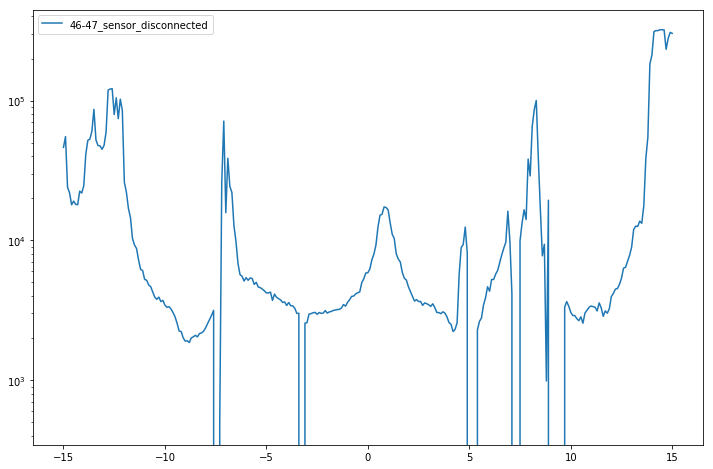

In [102]:
g46_47 = data21.srframe_volt_p1_set[:]
R46_47 = data21.lockin865_X[:]/0.5e-9
plt.figure(figsize=(12,8))
plt.semilogy(g46_47, R46_47, label='46-47_sensor_disconnected')
plt.legend()

In [103]:
gvals = np.linspace(-15, 15, 301)
data22, plot22 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.25, lockin865.X, lockin865.Y, DataName='M08_39-38_basetemp_0T')
srframe.volt_p1(0)

Started at 2019-10-04 16:45:23
DataSet:
   location = 'data/2019-10-04/#027_M08_39-38_basetemp_0T_16-45-22'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
Finished at 2019-10-04 16:53:29


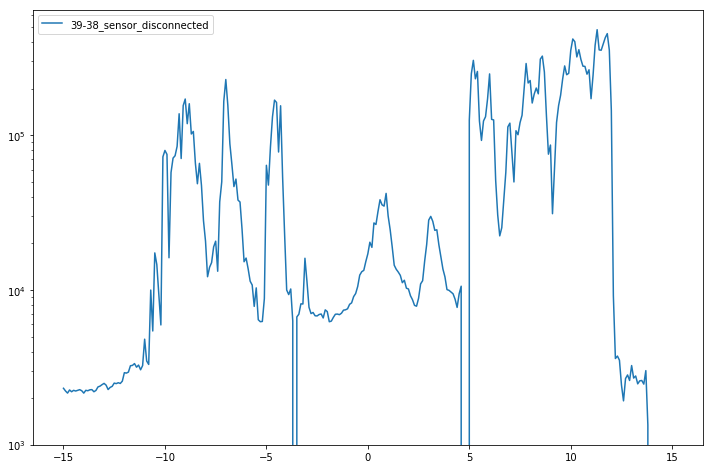

In [105]:
g39_38 = data22.srframe_volt_p1_set[:]
R39_38 = data22.lockin865_X[:]/0.5e-9
plt.figure(figsize=(12,8))
plt.semilogy(g39_38, R39_38, label='39-38_sensor_disconnected')
plt.legend()

In [106]:
gvals = np.linspace(-15, 15, 301)
data23, plot23 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.25, lockin865.X, lockin865.Y, DataName='M08_38-37_basetemp_0T')
srframe.volt_p1(0)

Started at 2019-10-04 16:57:36
DataSet:
   location = 'data/2019-10-04/#028_M08_38-37_basetemp_0T_16-57-35'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
Finished at 2019-10-04 17:05:42


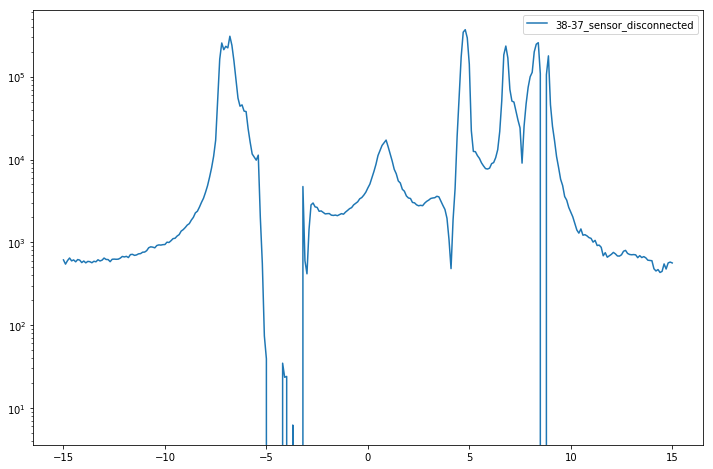

In [108]:
g38_37 = data23.srframe_volt_p1_set[:]
R38_37 = data23.lockin865_X[:]/0.5e-9
plt.figure(figsize=(12,8))
plt.semilogy(g38_37, R38_37, label='38-37_sensor_disconnected')
plt.legend()

In [109]:
gvals = np.linspace(-15, 15, 301)
data24, plot24 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.25, lockin865.X, lockin865.Y, DataName='M08_37-36_basetemp_0T')
srframe.volt_p1(0)

Started at 2019-10-04 17:07:42
DataSet:
   location = 'data/2019-10-04/#029_M08_37-36_basetemp_0T_17-07-41'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
Finished at 2019-10-04 17:15:47


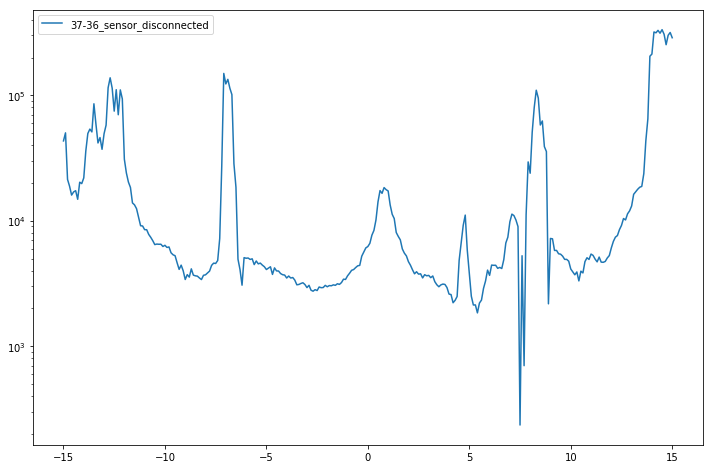

In [110]:
g37_36 = data24.srframe_volt_p1_set[:]
R37_36 = data24.lockin865_X[:]/0.5e-9
plt.figure(figsize=(12,8))
plt.semilogy(g37_36, R37_36, label='37-36_sensor_disconnected')
plt.legend()

In [111]:
gvals = np.linspace(-15, 15, 301)
data25, plot25 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.25, lockin865.X, lockin865.Y, DataName='M08_36-35_basetemp_0.7mT')
srframe.volt_p1(0)

Started at 2019-10-04 17:18:44
DataSet:
   location = 'data/2019-10-04/#030_M08_36-35_basetemp_0.7mT_17-18-43'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
Finished at 2019-10-04 17:24:25
Keyboard Interrupt


In [112]:
srframe.volt_p1(0)

In [113]:
#ABOVE MAY DUE TO BAD CONTACT

In [114]:
gvals = np.linspace(-15, 15, 301)
data26, plot26 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.25, lockin865.X, lockin865.Y, DataName='M08_38-39_basetemp_0.7mT')
srframe.volt_p1(0)

Started at 2019-10-04 17:26:35
DataSet:
   location = 'data/2019-10-04/#031_M08_38-39_basetemp_0.7mT_17-26-34'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
Finished at 2019-10-04 17:34:41


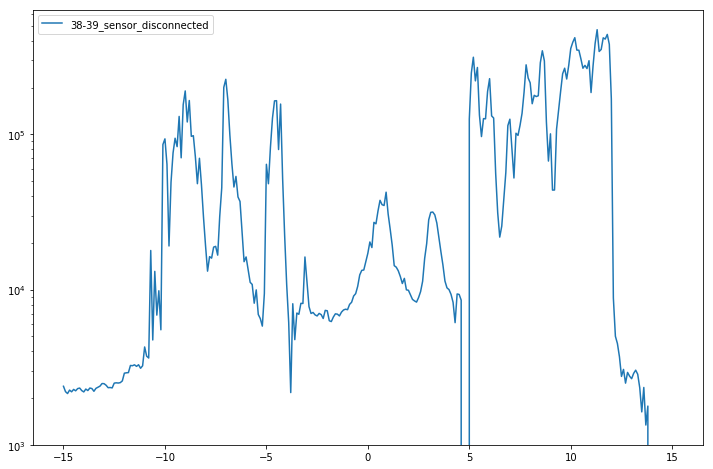

In [115]:
g38_39 = data26.srframe_volt_p1_set[:]
R38_39 = data26.lockin865_X[:]/0.5e-9
plt.figure(figsize=(12,8))
plt.semilogy(g38_39, R38_39, label='38-39_sensor_disconnected')
plt.legend()

In [116]:
gvals = np.linspace(-15, 15, 301)
data27, plot27 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.25, lockin865.X, lockin865.Y, DataName='M08_47-48_basetemp_0.7mT')
srframe.volt_p1(0)

Started at 2019-10-04 17:37:37
DataSet:
   location = 'data/2019-10-04/#032_M08_47-48_basetemp_0.7mT_17-37-36'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
Finished at 2019-10-04 17:40:21
Keyboard Interrupt


In [136]:
srframe.volt_p1(4.06)

In [118]:
#SEEMS Also bad contact

In [119]:
gvals = np.linspace(-15, 15, 301)
data28, plot28 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.25, lockin865.X, lockin865.Y, DataName='M08_43-44_basetemp_0.7mT')
srframe.volt_p1(0)

Started at 2019-10-04 17:42:06
DataSet:
   location = 'data/2019-10-04/#033_M08_43-44_basetemp_0.7mT_17-42-05'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
Finished at 2019-10-04 17:50:11


In [121]:
gvals = np.linspace(-15, 15, 301)
data29, plot29 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.25, lockin865.X, lockin865.Y, DataName='M08_38-37_basetemp_0.7mT')
srframe.volt_p1(0)

Started at 2019-10-04 18:37:22
DataSet:
   location = 'data/2019-10-04/#035_M08_38-37_basetemp_0.7mT_18-37-21'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
Finished at 2019-10-04 18:45:28


<IPython.core.display.Javascript object>


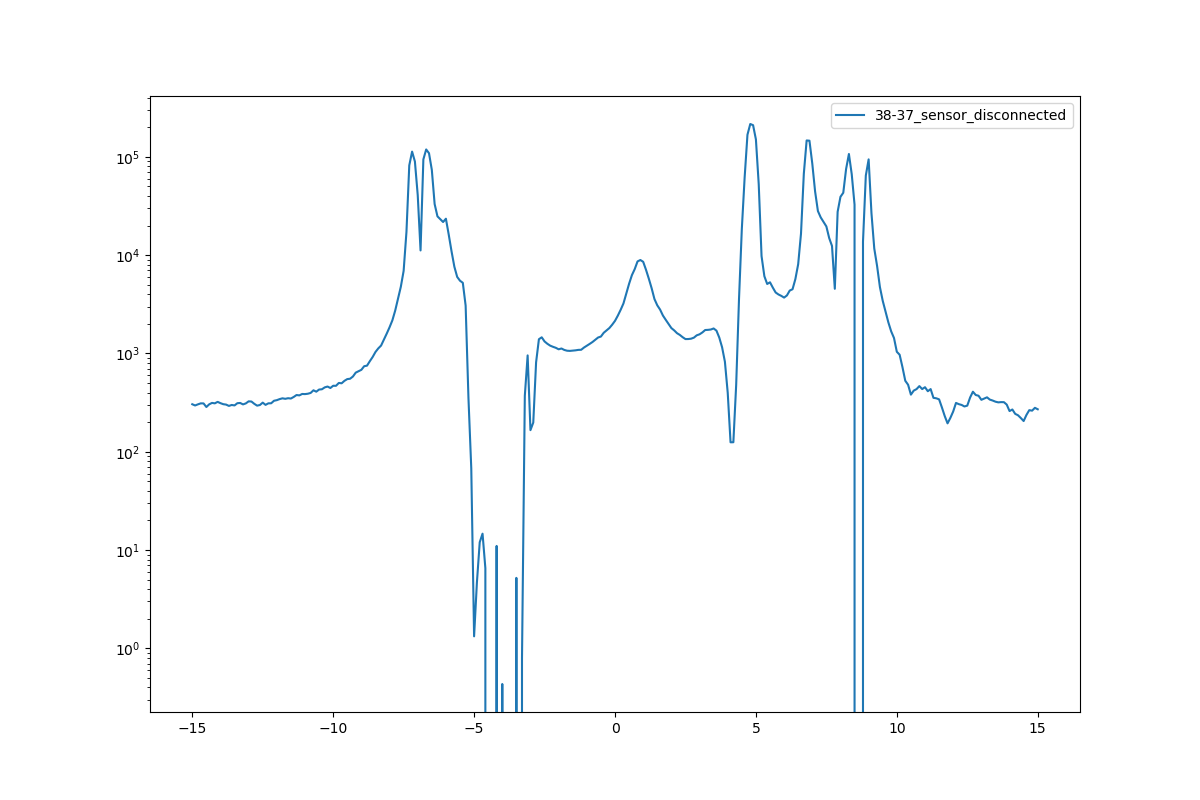

In [124]:
g38_37_2 = data29.srframe_volt_p1_set[:]
R38_37_2 = data29.lockin865_X[:]/0.5e-9
plt.figure(figsize=(12,8))
plt.semilogy(g38_37_2, R38_37_2, label='38-37_sensor_disconnected')
plt.legend()

In [125]:
%matplotlib inline

In [127]:
offvals = np.linspace(-10, 10, 201)
data30, plot30 = npd.single_param_sweep(srframe.volt_p5, offvals, 2, lockin865.X, lockin865.Y, DataName='M08_38-37_4.15Vbgbasetemp_0T_dvdi')

Started at 2019-10-04 18:49:47
DataSet:
   location = 'data/2019-10-04/#036_M08_38-37_4.15Vbgbasetemp_0T_dvdi_18-49-46'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2019-10-04 18:57:42


In [138]:
srframe.volt_p5(0)

In [137]:
offvals = np.linspace(-6, 6, 121)
data31, plot31 = npd.single_param_sweep(srframe.volt_p5, offvals, 2, lockin865.X, lockin865.Y, DataName='M08_38-37_4.06Vbgbasetemp_0T_dvdi')

Started at 2019-10-04 19:00:28
DataSet:
   location = 'data/2019-10-04/#037_M08_38-37_4.06Vbgbasetemp_0T_dvdi_19-00-27'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (121,)
   Measured | lockin865_X         | X            | (121,)
   Measured | lockin865_Y         | Y            | (121,)
Finished at 2019-10-04 19:05:14


## Measuring Rxx on 38-37, Rxy on 38-44, 0.5 nA excitation

In [139]:
gvals = np.linspace(-15, 15, 301)
data32, plot32 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.25, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M08_Rxx38-37_Rxy38-44_basetemp_0.7mT')

Started at 2019-10-04 19:06:52
DataSet:
   location = 'data/2019-10-04/#038_M08_Rxx38-37_Rxy38-44_basetemp_0.7mT_19-06-51'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
   Measured | lockin830_X         | X            | (301,)
   Measured | lockin830_Y         | Y            | (301,)
Finished at 2019-10-04 19:15:28


In [ ]:
gvals = np.linspace(15, -15, 301)
bvals = np.linspace(0, 8, 81)
data33, plot33 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=1.5, SetDelay2=1.5, DataName='0to8TtwodSweep_0.5nAexcM08_Rxx38-37_Rxy38-44_basetemp')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-10-04 19:25:14
Please wait 10.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 70.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 69.988 seconds for the field sweep, plus the time required for operating the switch...
Please wait 70.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 69.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 70.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 69.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 70.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 70.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 70.006 seconds for the field sweep, plus the time required for operating

In [9]:
plot33[0]

NameError: name 'plot33' is not defined

In [10]:
gvals = np.linspace(-15, 15, 301)
data34, plot34 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.25, lockin865.X, lockin865.Y, DataName='M08_38-37_basetemp_0.7mT')
srframe.volt_p1(0)

Started at 2019-10-05 09:24:27
DataSet:
   location = 'data/2019-10-05/#001_M08_38-37_basetemp_0.7mT_09-24-24'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
Finished at 2019-10-05 09:32:38


NameError: name 'g38_37_2' is not defined

<Figure size 864x576 with 0 Axes>

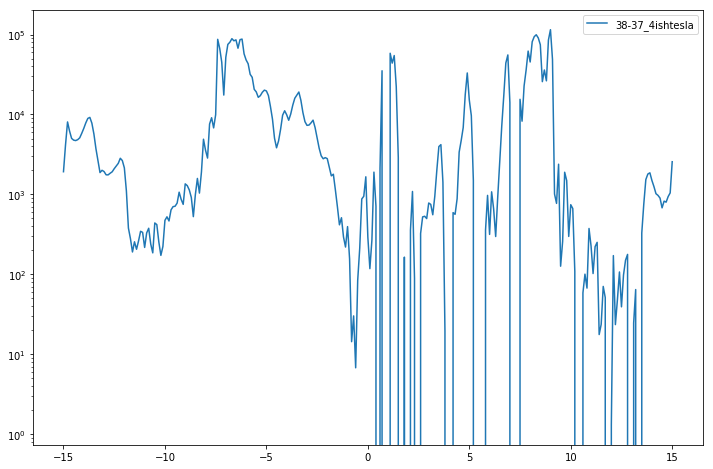

In [12]:
g38_37_3 = data34.srframe_volt_p1_set[:]
R38_37_3 = data34.lockin865_X[:]/0.5e-9
plt.figure(figsize=(12,8))
plt.semilogy(g38_37_3, R38_37_3, label='38-37_4ishtesla')
plt.legend()

In [13]:
gvals = np.linspace(15, -15, 301)
bvals = np.linspace(8, 0, 81)
data35, plot35 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=1.5, SetDelay2=1.5, DataName='8to0TtwodSweep_0.5nAexcM08_Rxx38-37_Rxy38-44_basetemp')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-10-05 09:35:47
Are you sure you want to use the magnet? [y/n]: y
Please wait 2230.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 70.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 70.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 70.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 70.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 70.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 70.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 70.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 70.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 70.012 seconds for the fie

In [52]:
data35 = qc.load_data('data/2019-10-05/#002_8to0TtwodSweep_0.5nAexcM08_Rxx38-37_Rxy38-44_basetemp_09-35-45')

In [53]:
data35.triton_field_set_stable_set

DataArray[81]: triton_field_set_stable_set
array([8. , 7.9, 7.8, 7.7, 7.6, 7.5, 7.4, 7.3, 7.2, 7.1, 7. , 6.9, 6.8,
       6.7, 6.6, 6.5, 6.4, 6.3, 6.2, 6.1, 6. , 5.9, 5.8, 5.7, 5.6, 5.5,
       5.4, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan])

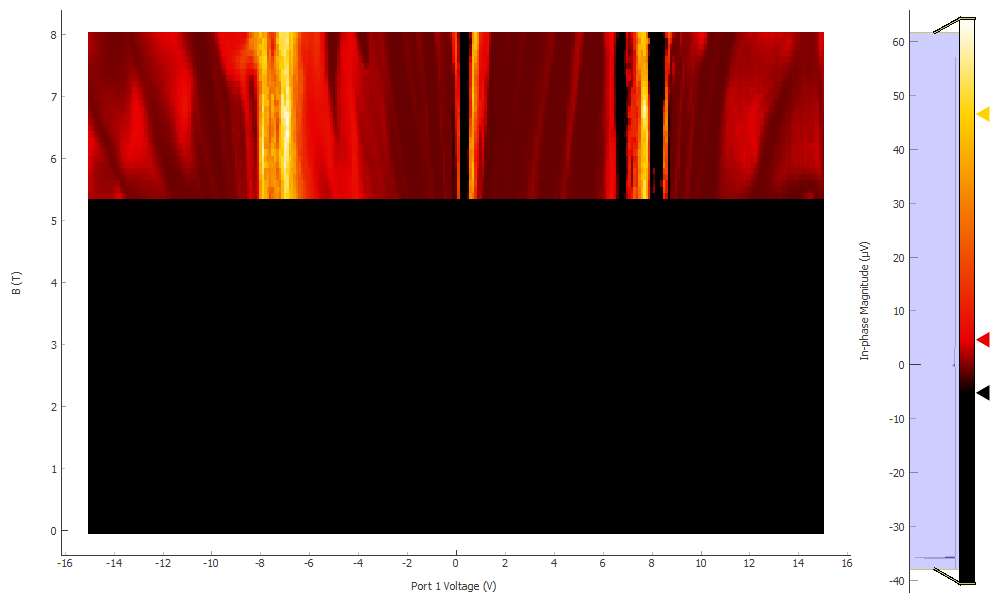

In [22]:
plot35[0]

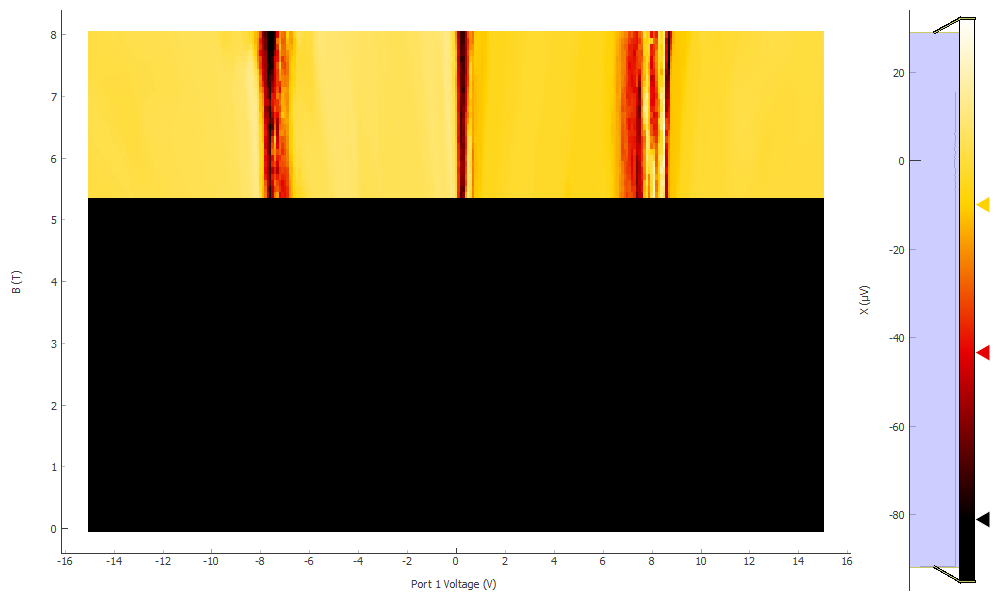

In [23]:
plot35[2]

In [ ]:
gvals = np.linspace(14, -14, 281)
bvals = np.linspace(0.1, 0, 21)
data36, plot36 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=1.5, SetDelay2=1.5, DataName='100mTto0TtwodSweep_0.5nAexcM08_Rxx38-37_Rxy38-44_basetemp')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-10-05 18:02:58
DataSet:
   location = 'data/2019-10-05/#003_M08_38-37_basetemp_0.7mT_18-02-57'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
Finished at 2019-10-05 18:11:04


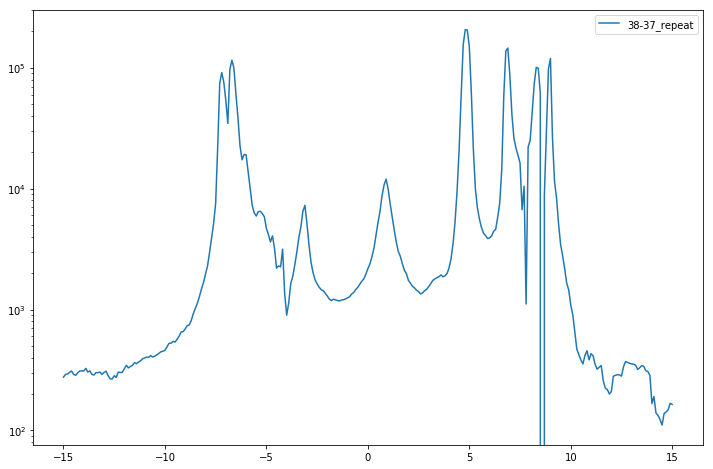

In [24]:
gvals = np.linspace(-15, 15, 301)
data38, plot38 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.25, lockin865.X, lockin865.Y, DataName='M08_38-37_basetemp_0.7mT')
srframe.volt_p1(0)

g38_37_4 = data38.srframe_volt_p1_set[:]
R38_37_4 = data38.lockin865_X[:]/0.5e-9
plt.figure(figsize=(12,8))
plt.semilogy(g38_37_4, R38_37_4, label='38-37_repeat')
plt.legend()

In [31]:
gvals = np.linspace(-10, 10, 201)
data39, plot39 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.25, lockin865.X, lockin865.Y, DataName='M08_38-37_basetemp_0.7mT')
srframe.volt_p1(0)

Started at 2019-10-05 18:16:46
DataSet:
   location = 'data/2019-10-05/#004_M08_38-37_basetemp_0.7mT_18-16-45'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2019-10-05 18:22:10


In [41]:
triton.MC_temp_enable(1)

In [64]:
triton.MC_temp()

0.0547456

In [65]:
triton.magnet_temp()

4.51966

In [58]:
triton.field()

0.0

In [66]:
gvals = np.linspace(-10, 10, 201)
data39, plot39 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.25, lockin865.X, lockin865.Y, DataName='M08_38-37_basetemp_0mT')
srframe.volt_p1(0)

Started at 2019-10-05 20:07:20
DataSet:
   location = 'data/2019-10-05/#005_M08_38-37_basetemp_0mT_20-07-19'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2019-10-05 20:12:44


In [70]:
%matplotlib notebook

<IPython.core.display.Javascript object>


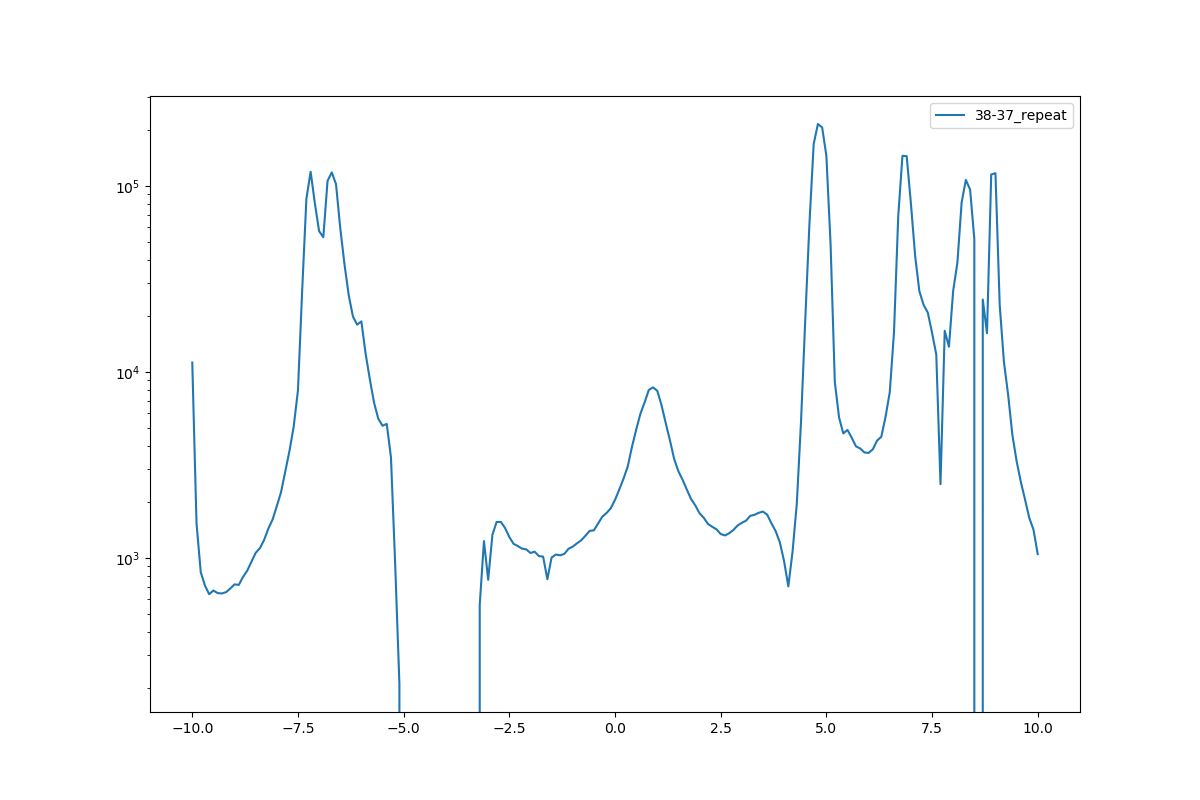

In [71]:
g38_37_5 = data39.srframe_volt_p1_set[:]
R38_37_5 = data39.lockin865_X[:]/0.5e-9
plt.figure(figsize=(12,8))
plt.semilogy(g38_37_5, R38_37_5, label='38-37_repeat')
plt.legend()

In [72]:
triton.MC_temp_enable(0)

In [73]:
triton.read_pressures()

P1:  -1.86162
P2:  312.315
P3:  0.0483
P4:  0.937
P5:  66.7808
POVC:  0.00035


In [74]:
triton.read_temps()

MC - off:  0.035856 K
MC_cernox - off:  1.21336 K
still - off:  0.733706 K
cold_plate - off:  0.0650397 K
magnet - on:  4.2577 K
PT2h - off:  3.49526 K
PT2p - off:  3.7111 K
PT1h - off:  45.6463 K
PT1p - off:  61.0569 K


In [75]:
triton.read_pumps()

Turbo: 1,  speed: 819.0 Hz
KNF: 1
Forepump: 1


In [77]:
srframe.volt_p1(0)

In [78]:
offvals = np.linspace(9000e-3, -9000e-3, 181)
gvals = np.linspace(-9, 9, 91)
data40, plot40 = npd.twod_param_sweep(srframe.volt_p1, gvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=1.5, SetDelay2=1.5, DataName='M08_Rxx38-37_Rxy38-44_0.5nAdvdi_baseT_b=-0mT')
srframe.volt_p1(0)
srframe.volt_p5(0)

Started at 2019-10-05 23:08:41
DataSet:
   location = 'data/2019-10-05/#006_M08_Rxx38-37_Rxy38-44_0.5nAdvdi_baseT_b=-0mT_23-08-38'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (91,)
   Setpoint | srframe_volt_p5_set | volt_p5      | (91, 181)
   Measured | lockin865_X         | X            | (91, 181)
   Measured | lockin865_Y         | Y            | (91, 181)
   Measured | lockin830_X         | X            | (91, 181)
   Measured | lockin830_Y         | Y            | (91, 181)
Finished at 2019-10-06 08:06:06


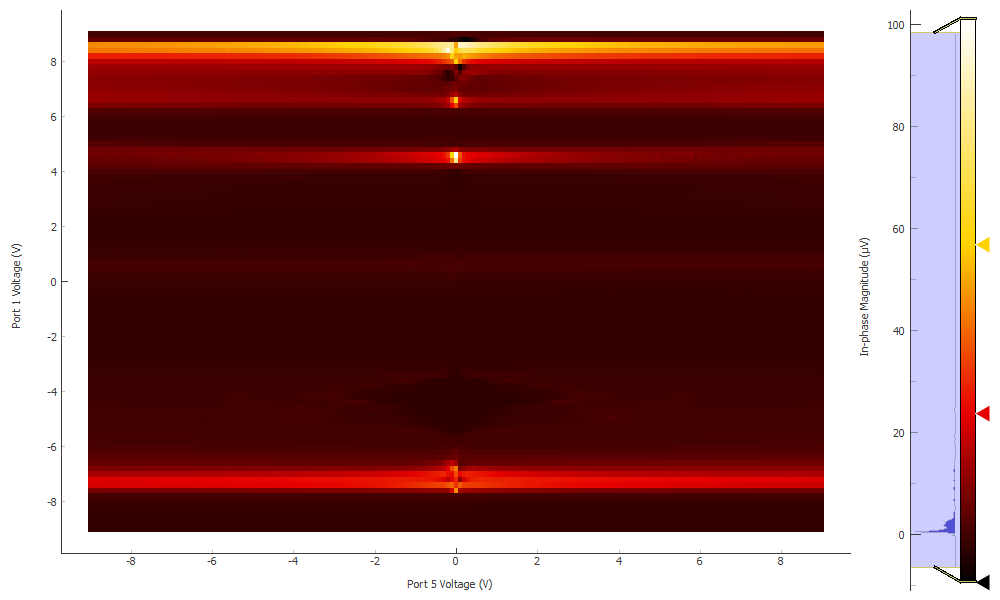

In [79]:
plot40[0]

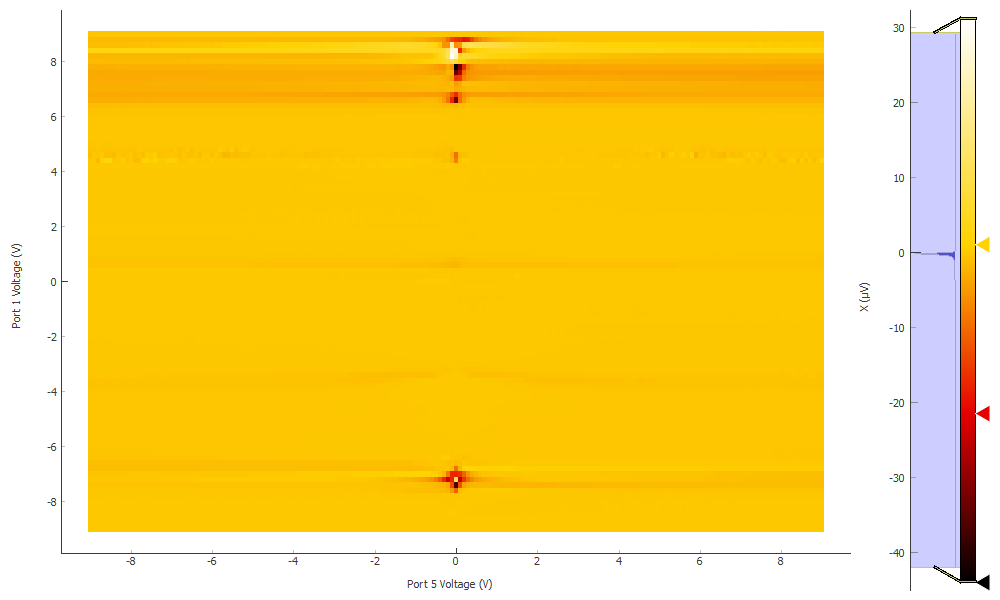

In [80]:
plot40[2]

In [81]:
triton.magnet_sweeprate(0.05)
triton.magnet_swh(1)

Wait 5 min for the switch to warm


In [82]:
gvals = np.linspace(10, -10, 201)
bvals = np.linspace(0.2, 0, 41)
data41, plot41 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=1.5, SetDelay2=1.5, DataName='100mTto0TtwodSweep_0.5nAexcM08_Rxx38-37_Rxy38-44_basetemp')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-10-06 08:11:52
Please wait 249.97 seconds for the field sweep, plus the time required for operating the switch...
Please wait 16.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 15.988 seconds for the field sweep, plus the time required for operating the switch...
Please wait 16.018 seconds for the field sweep, plus the time required for operating the switch...
Please wait 15.975999999999999 seconds for the field sweep, plus the time required for operating the switch...
Please wait 15.982 seconds for the field sweep, plus the time required for operating the switch...
Please wait 16.024 seconds for the field sweep, plus the time required for operating the switch...
Please wait 16.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 16.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 15.988 seconds for the field sweep, plus the time requ

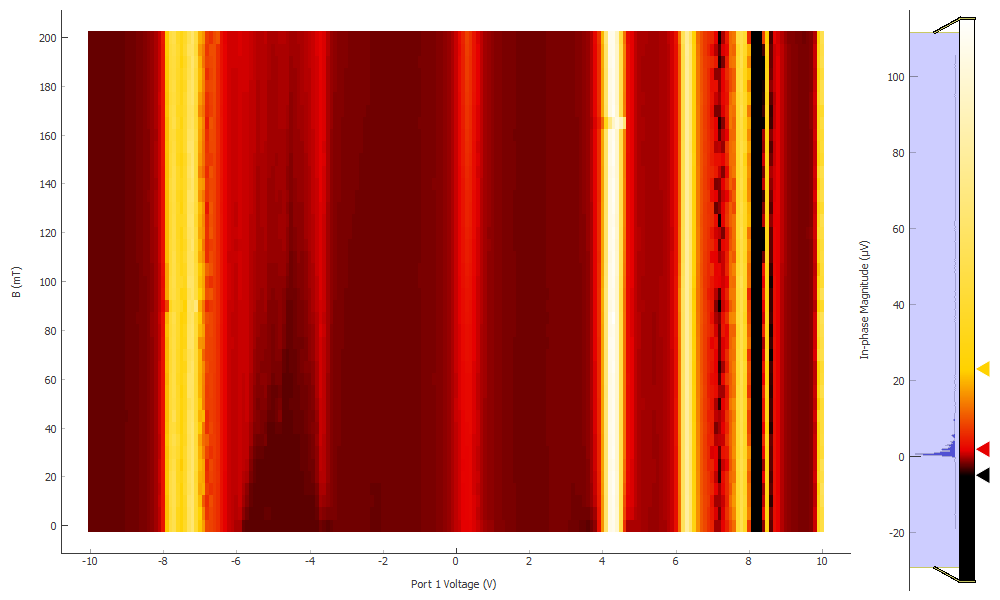

In [83]:
plot41[0]

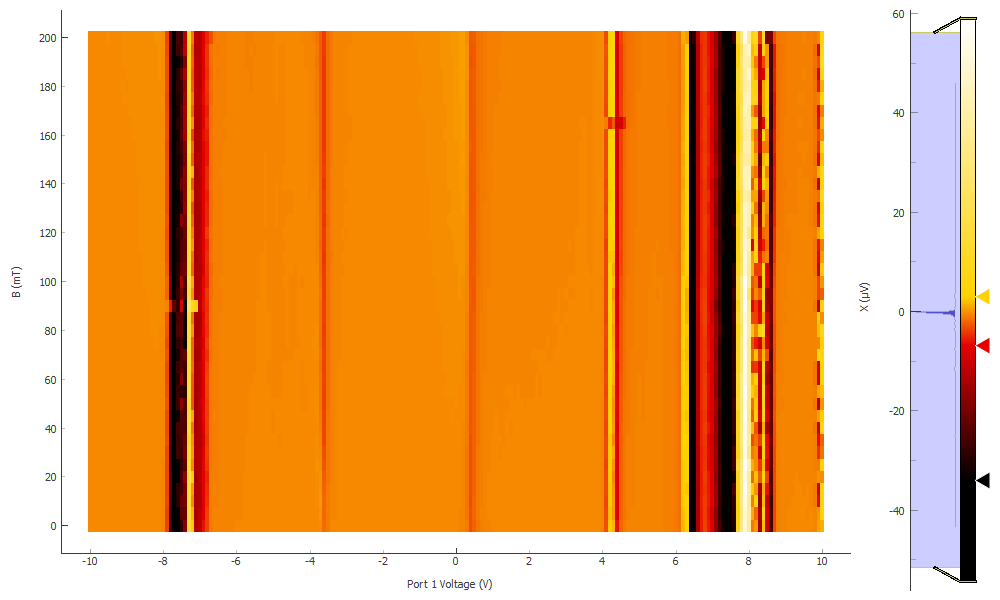

In [84]:
plot41[2]

In [88]:
triton.magnet_sweeprate(0.1)

## M08 main (38-37) fan

In [116]:
gvals = np.linspace(11, -11, 441)
bvals = np.linspace(0, 8, 161)
data43, plot43 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=1, SetDelay2=1, DataName='0to8TtwodSweep_0.5nAexcM08_Rxx38-37_Rxy38-44_basetemp_161fieldpts')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-10-06 16:35:33
Please wait 10.018 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.988 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.988 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for ope

In [127]:
data43 = qc.load_data('data/2019-10-06/#003_0to8TtwodSweep_0.5nAexcM08_Rxx38-37_Rxy38-44_basetemp_161fieldpts_16-35-30')

In [131]:
plot43 = qc.QtPlot(data43.lockin865_X)
plot44 = qc.QtPlot(data43.lockin830_X)

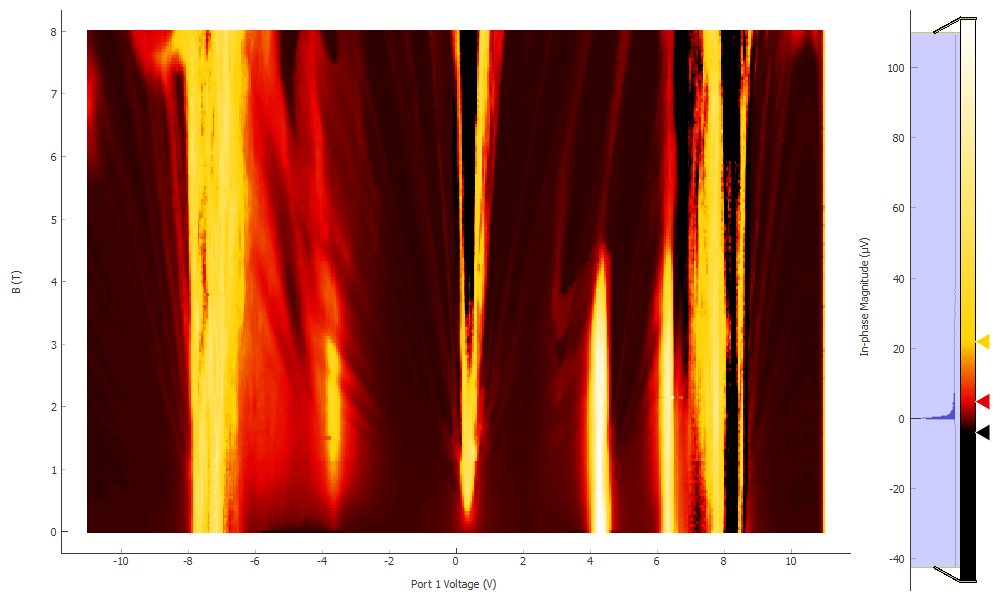

In [130]:
plot43

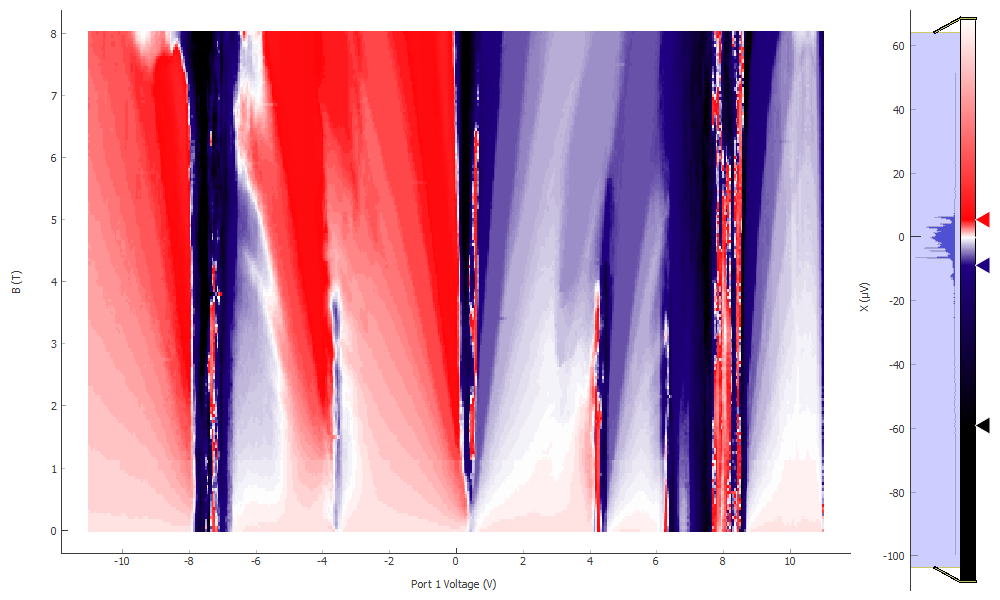

In [133]:
plot44

In [86]:
triton.magnet_sweeprate(0.1)

In [117]:
triton.field(0)

Sweep time approximately 4810.0 seconds


## M08 38-37 fraunhofers and gate vs. dvdi

In [120]:
srframe.volt_p1(-4.2)
offvals = np.linspace(4000e-3, -4000e-3, 81)
bvals = np.linspace(0.1, -0.1, 201)
data44, plot44 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, SetDelay1=1, SetDelay2=1, DataName='M08_Rxx38-37_Rxy38-44_Bsweep_vbg=-4.2V_AC0.5nAdvdi_baseT_coarse')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-10-07 19:36:46
Please wait 38.806 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.6 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.606 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.6 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.612 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.594 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.612 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.606 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.6 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.588 seconds for the field sweep, plus the time required for operating

In [121]:
srframe.volt_p1(-3.6)
offvals = np.linspace(2500e-3, -2500e-3, 51)
bvals = np.linspace(0.08, -0.08, 161)
data45, plot45 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, SetDelay1=1, SetDelay2=1, DataName='M08_Rxx38-37_Rxy38-44_Bsweep_vbg=-3.6V_AC0.5nAdvdi_baseT_coarse')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-10-08 02:34:20
Please wait 118.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.606 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.606 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.588 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.606 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.606 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.594 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.606 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.6 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.606 seconds for the field sweep, plus the time required for operat

In [123]:
srframe.volt_p1(3.6)
offvals = np.linspace(1000e-3, -1000e-3, 41)
bvals = np.linspace(0.04, -0.04, 161)
data46, plot46 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, SetDelay1=1, SetDelay2=1, DataName='M08_Rxx38-37_Rxy38-44_Bsweep_vbg=3.8V_AC0.5nAdvdi_baseT_coarse')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-10-08 11:12:45
Please wait 34.03 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.3 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.3 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.306000000000001 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.3 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.306000000000001 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.3 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.306000000000001 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.3 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.306000000000001 seconds for the field 

In [140]:
triton.field(-0.001)

Sweep time approximately 10.126 seconds


In [148]:
srframe.volt_p1(3.8)
offvals = np.linspace(200e-3, -200e-3, 21)
bvals = np.linspace(0.01, -0.01, 41)
data46, plot46 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, SetDelay1=3, SetDelay2=3, DataName='M08_Rxx38-37_Rxy38-44_Bsweep_vbg=3.85V_AC0.1nAdvdi_baseT_coarse')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-10-08 15:22:33
Please wait 10.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.294 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.3 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.294 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.318 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.3 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.306000000000001 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.27 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.288 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.294 seconds for the field sweep, plus the time required 

In [149]:
srframe.volt_p1(-4.4)
offvals = np.linspace(4000e-3, -4000e-3, 81)
bvals = np.linspace(0.1, -0.1, 201)
data47, plot47 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, SetDelay1=1.3, SetDelay2=1.3, DataName='M08_Rxx38-37_Rxy38-44_Bsweep_vbg=-4.4V_AC0.5nAdvdi_baseT_coarse')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-10-08 16:31:27
Please wait 76.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.6 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.612 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.6 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.6 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.594 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.594 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.612 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.594 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.612 seconds for the field sweep, plus the time required for operating t

In [150]:
srframe.volt_p1(-4.5)
offvals = np.linspace(3000e-3, -3000e-3, 61)
bvals = np.linspace(0.1, -0.1, 201)
data48, plot48 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=1.3, SetDelay2=1.3, DataName='M08_Rxx38-37_Rxy38-44_Bsweep_vbg=-4.5V_AC0.5nAdvdi_baseT_coarse')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-10-09 00:52:01
Please wait 130.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.612 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.612 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.63 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.612 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.618 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.594 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.6 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.624 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.606 seconds for the field sweep, plus the time required for operati

In [153]:
triton.field(-0.0008)

Sweep time approximately 10.006 seconds


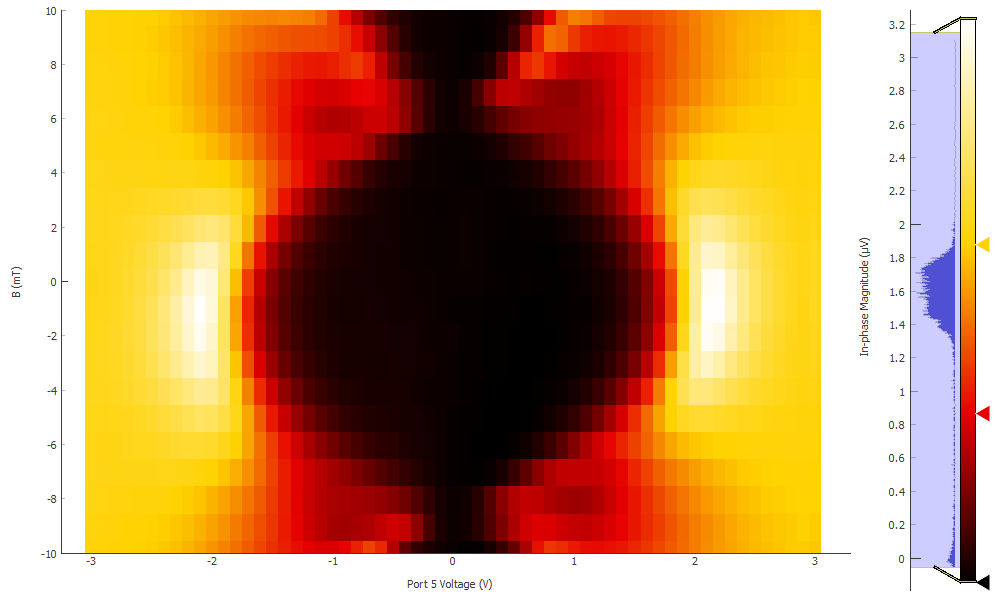

In [154]:
plot48[0]

In [155]:
offvals = np.linspace(3000e-3, -3000e-3, 181)
gvals = np.linspace(-6, -1, 101)
data49, plot49 = npd.twod_param_sweep(srframe.volt_p1, gvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=1.3, SetDelay2=1.3, DataName='M08_Rxx38-37_Rxy38-44_0.2nAdvdi_baseT_holepocket_b=-0.8mT')
srframe.volt_p1(0)
srframe.volt_p5(0)

Started at 2019-10-09 11:15:48
DataSet:
   location = 'data/2019-10-09/#002_M08_Rxx38-37_Rxy38-44_0.2nAdvdi_baseT_holepocket_b=-0.8mT_11-15-46'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (101,)
   Setpoint | srframe_volt_p5_set | volt_p5      | (101, 181)
   Measured | lockin865_X         | X            | (101, 181)
   Measured | lockin865_Y         | Y            | (101, 181)
   Measured | lockin830_X         | X            | (101, 181)
   Measured | lockin830_Y         | Y            | (101, 181)
Finished at 2019-10-09 18:44:48


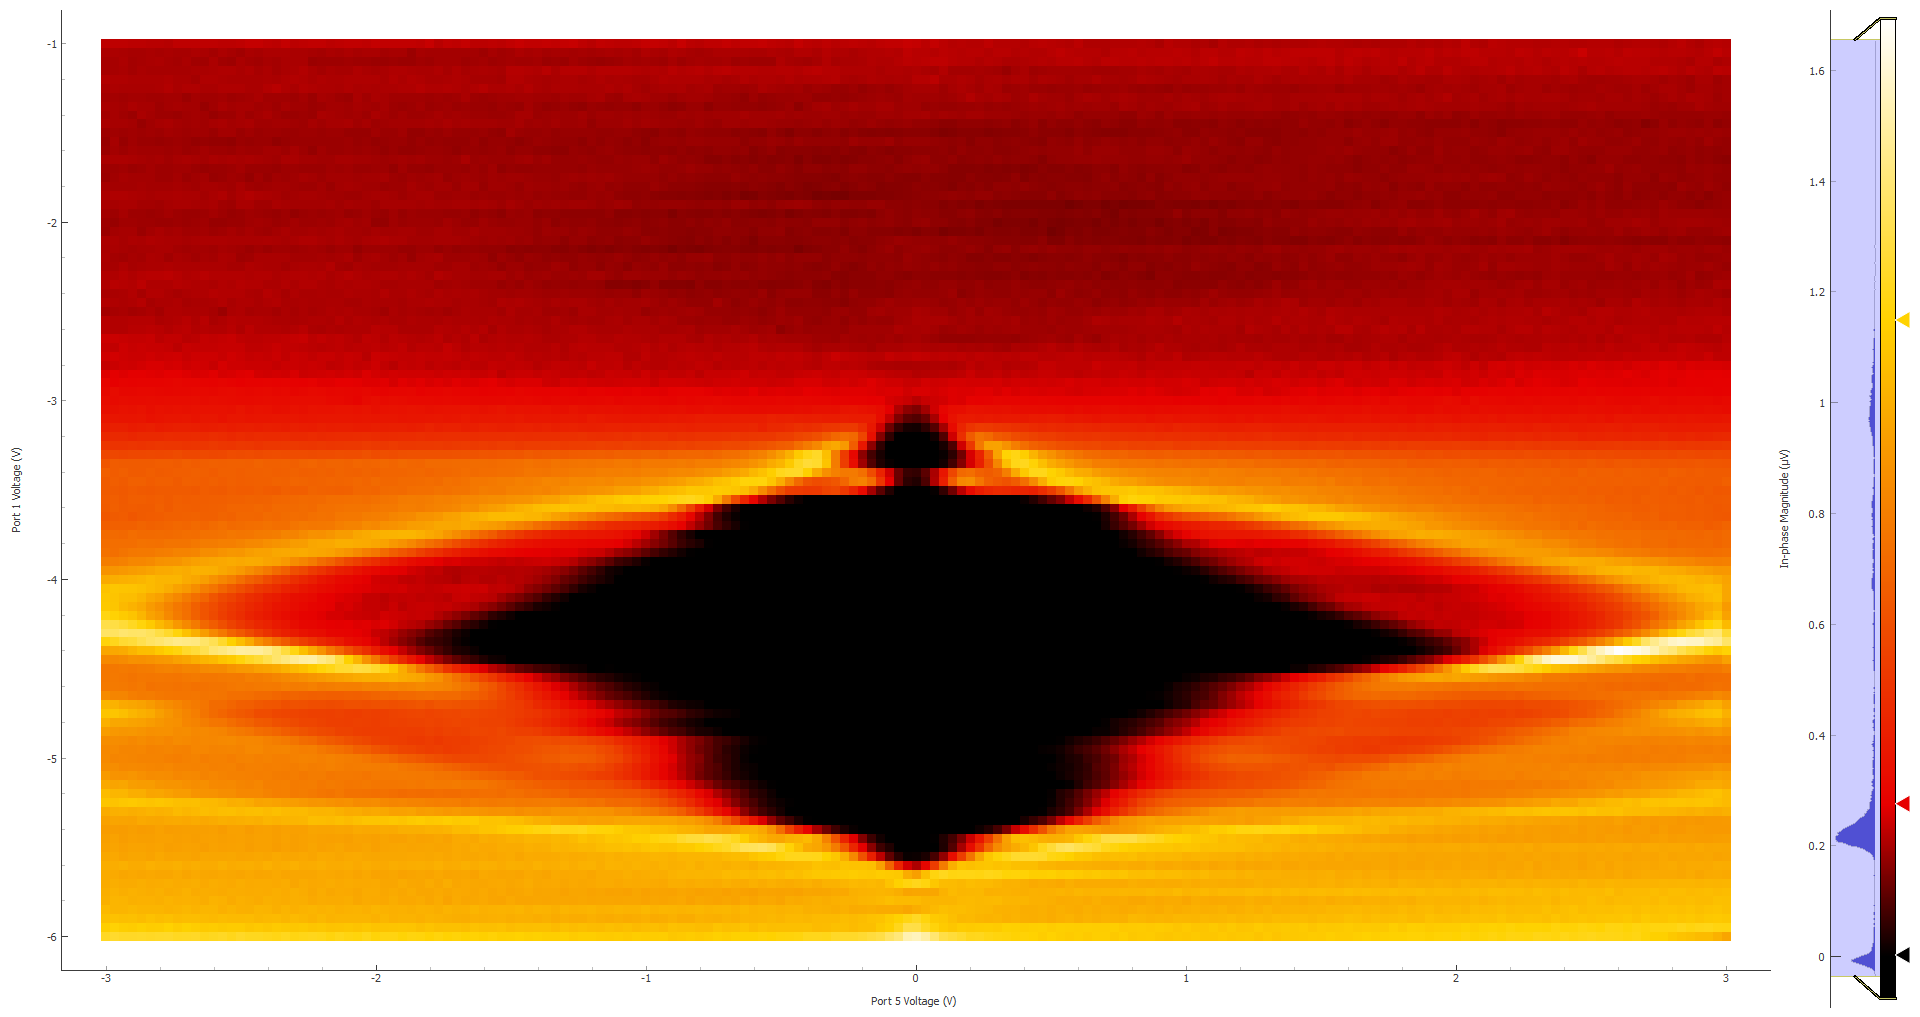

In [156]:
plot49[0]

Started at 2019-10-09 18:44:58
DataSet:
   location = 'data/2019-10-09/#003_M08_38-37_basetemp_-.08mT_0.2nA_18-44-57'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin865_X         | X            | (401,)
   Measured | lockin865_Y         | Y            | (401,)
Finished at 2019-10-09 18:59:24


<IPython.core.display.Javascript object>


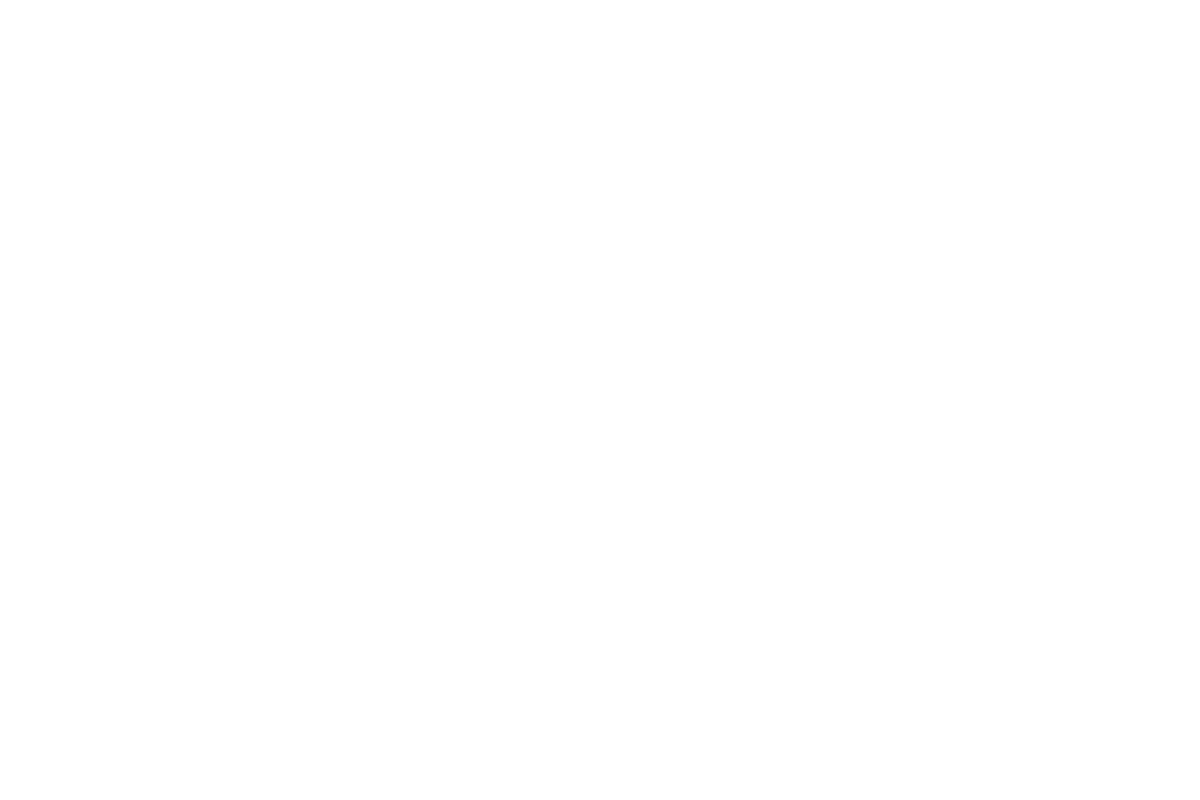

In [157]:
gvals = np.linspace(-10, 10, 401)
data50, plot50 = npd.single_param_sweep(srframe.volt_p1, gvals, 2, lockin865.X, lockin865.Y, DataName='M08_38-37_basetemp_-.08mT_0.2nA')
srframe.volt_p1(0)
g38_37_6 = data50.srframe_volt_p1_set[:]
R38_37_6 = data50.lockin865_X[:]/0.2e-9
plt.figure(figsize=(12,8))
plt.semilogy(g38_37_6, R38_37_6, label='38-37_everythingdisconnected0.2nA')
plt.legend()

Started at 2019-10-09 18:59:45
DataSet:
   location = 'data/2019-10-09/#004_M08_38-37_basetemp_-.08mT_0.4nA_18-59-44'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin865_X         | X            | (401,)
   Measured | lockin865_Y         | Y            | (401,)
Finished at 2019-10-09 19:14:11


<IPython.core.display.Javascript object>


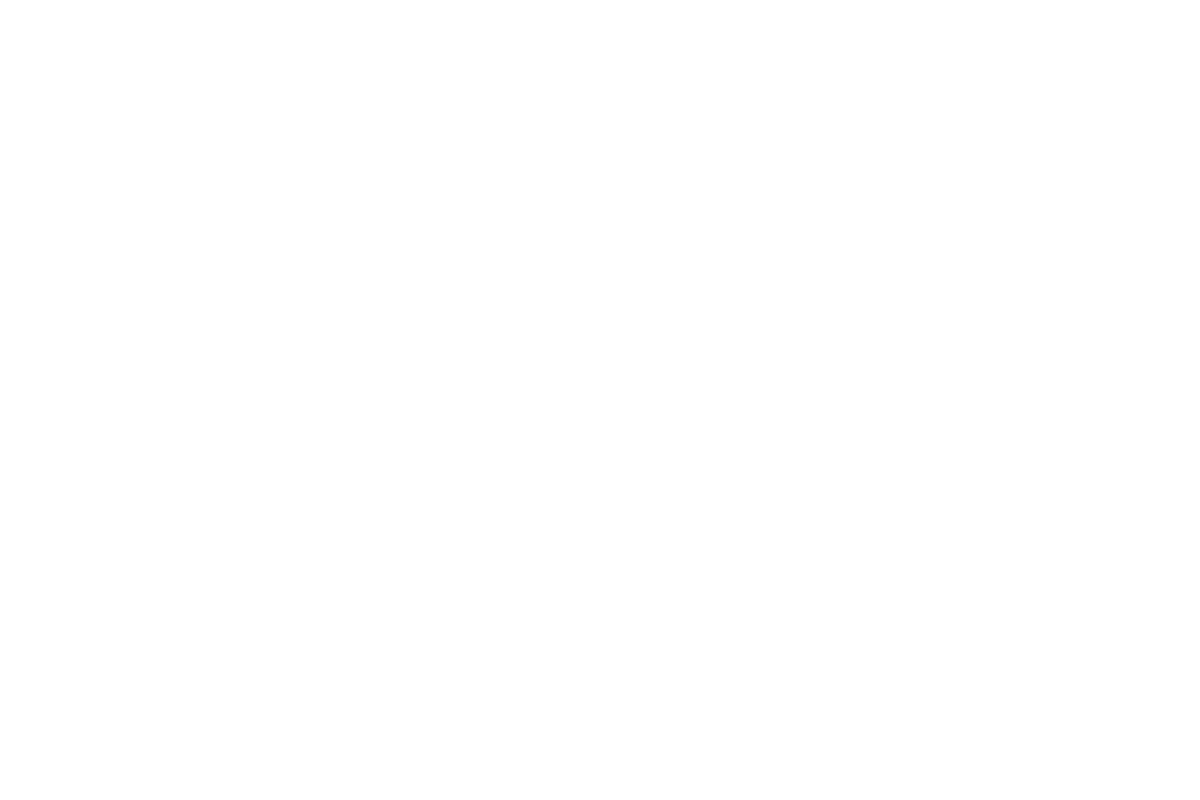

In [158]:
lockin865.amplitude(0.04)
gvals = np.linspace(-10, 10, 401)
data51, plot51 = npd.single_param_sweep(srframe.volt_p1, gvals, 2, lockin865.X, lockin865.Y, DataName='M08_38-37_basetemp_-.08mT_0.4nA')
srframe.volt_p1(0)
g38_37_7 = data51.srframe_volt_p1_set[:]
R38_37_7 = data51.lockin865_X[:]/0.4e-9
plt.figure(figsize=(12,8))
plt.semilogy(g38_37_7, R38_37_7, label='38-37_everythingdisconnected0.4nA')
plt.legend()

Started at 2019-10-09 19:14:32
DataSet:
   location = 'data/2019-10-09/#005_M08_38-37_basetemp_-.08mT_1nA_19-14-31'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin865_X         | X            | (401,)
   Measured | lockin865_Y         | Y            | (401,)
Finished at 2019-10-09 19:29:04


<IPython.core.display.Javascript object>


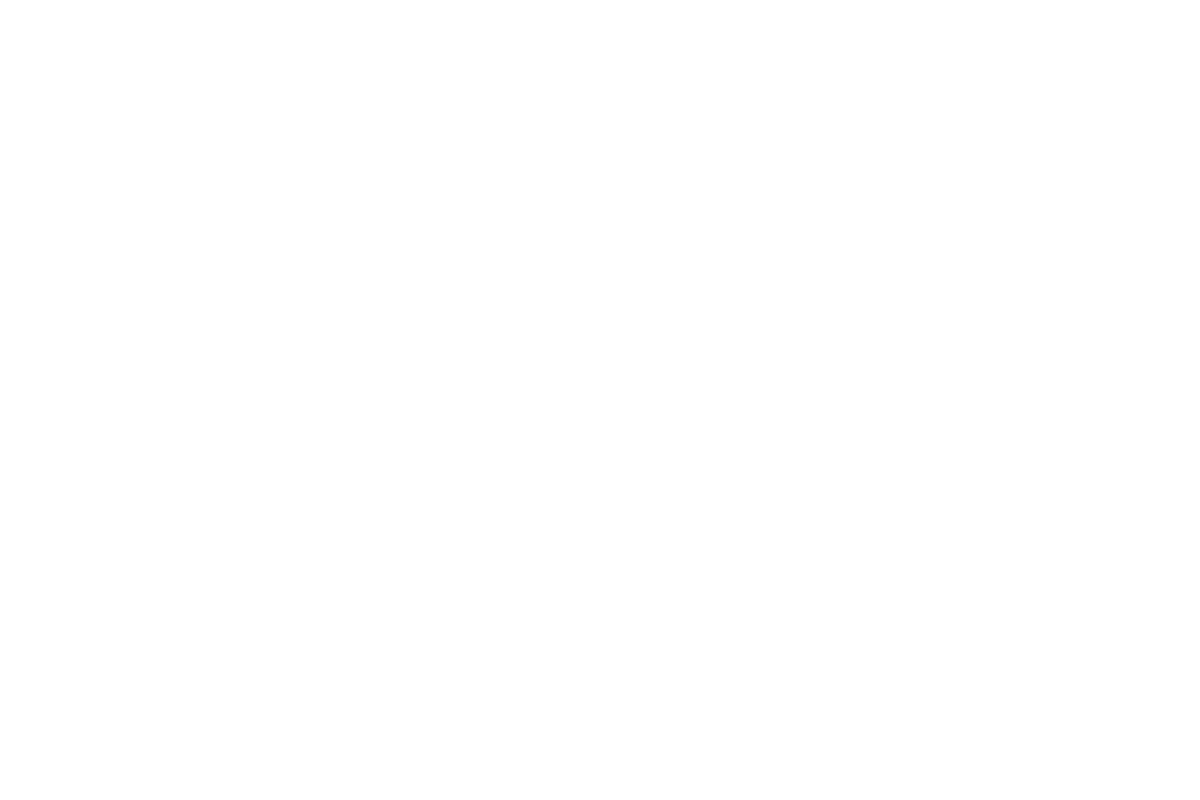

In [159]:
lockin865.amplitude(0.1)
gvals = np.linspace(-10, 10, 401)
data52, plot52 = npd.single_param_sweep(srframe.volt_p1, gvals, 2, lockin865.X, lockin865.Y, DataName='M08_38-37_basetemp_-.08mT_1nA')
srframe.volt_p1(0)
g38_37_8 = data52.srframe_volt_p1_set[:]
R38_37_8 = data52.lockin865_X[:]/1e-9
plt.figure(figsize=(12,8))
plt.semilogy(g38_37_8, R38_37_8, label='38-37_everythingdisconnected1nA')
plt.legend()

Started at 2019-10-09 19:29:25
DataSet:
   location = 'data/2019-10-09/#006_M08_38-37_basetemp_-.08mT_10nA_19-29-24'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin865_X         | X            | (401,)
   Measured | lockin865_Y         | Y            | (401,)
Finished at 2019-10-09 19:43:51


<IPython.core.display.Javascript object>


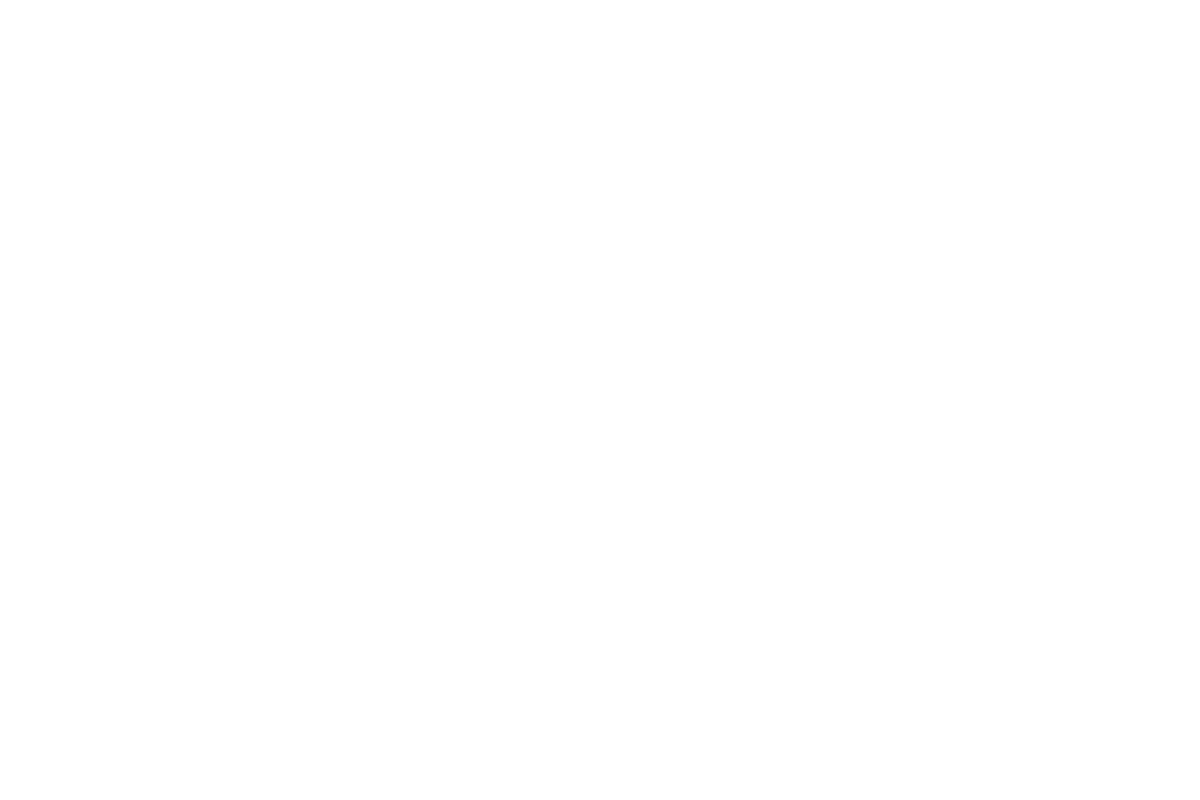

In [160]:
lockin865.amplitude(1)
gvals = np.linspace(-10, 10, 401)
data53, plot53 = npd.single_param_sweep(srframe.volt_p1, gvals, 2, lockin865.X, lockin865.Y, DataName='M08_38-37_basetemp_-.08mT_10nA')
srframe.volt_p1(0)
g38_37_9 = data53.srframe_volt_p1_set[:]
R38_37_9 = data53.lockin865_X[:]/10e-9
plt.figure(figsize=(12,8))
plt.semilogy(g38_37_9, R38_37_9, label='38-37_everythingdisconnected10nA')
plt.legend()

In [162]:
%matplotlib inline

Started at 2019-10-09 23:44:18
DataSet:
   location = 'data/2019-10-09/#007_M08_38-37_basetemp_-.08mT_20nA_23-44-17'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin865_X         | X            | (401,)
   Measured | lockin865_Y         | Y            | (401,)
Finished at 2019-10-09 23:58:45


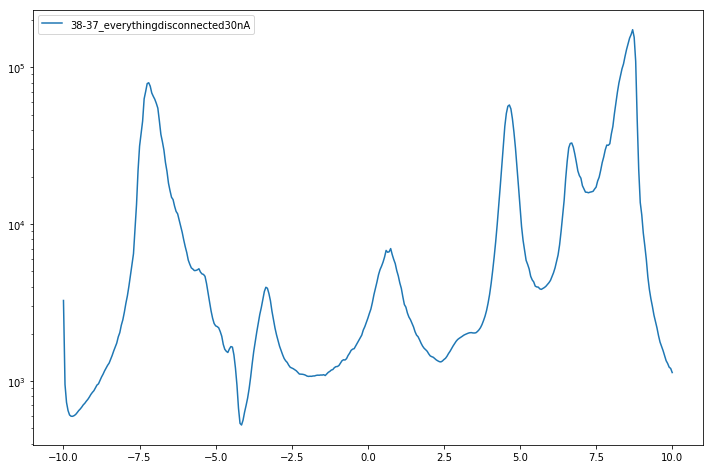

In [164]:
lockin865.amplitude(2)
gvals = np.linspace(-10, 10, 401)
data54, plot54 = npd.single_param_sweep(srframe.volt_p1, gvals, 2, lockin865.X, lockin865.Y, DataName='M08_38-37_basetemp_-.08mT_20nA')
srframe.volt_p1(0)
lockin865.amplitude(0.02)
g38_37_10 = data54.srframe_volt_p1_set[:]
R38_37_10 = data54.lockin865_X[:]/20e-9
plt.figure(figsize=(12,8))
plt.semilogy(g38_37_10, R38_37_10, label='38-37_everythingdisconnected30nA')
plt.legend()

In [ ]:
lockin865.amplitude(0.01)
gvals = np.linspace(-10, 10, 401)
data55, plot55 = npd.single_param_sweep(srframe.volt_p1, gvals, 2, lockin865.X, lockin865.Y, DataName='M08_38-37_basetemp_-.08mT_0.1nA')
srframe.volt_p1(0)
lockin865.amplitude(0.02)

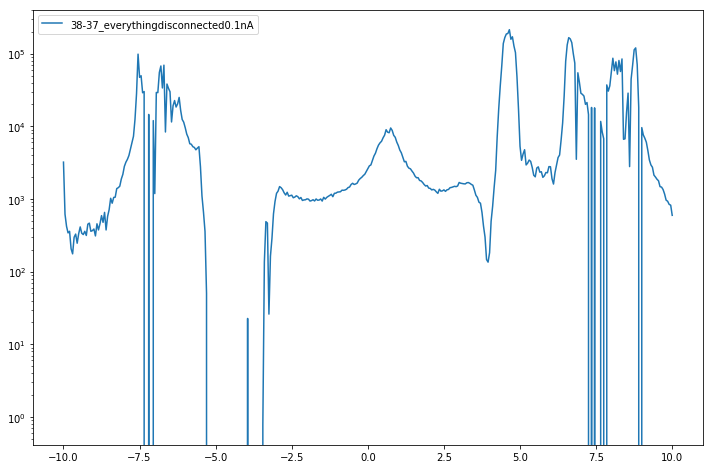

In [179]:
g38_37_11 = data55.srframe_volt_p1_set[:]
R38_37_11 = data55.lockin865_X[:]/0.1e-9
plt.figure(figsize=(12,8))
plt.semilogy(g38_37_11, R38_37_11, label='38-37_everythingdisconnected0.1nA')
plt.legend()

In [172]:
srframe.volt_p1(0)
srframe.volt_p5(0)

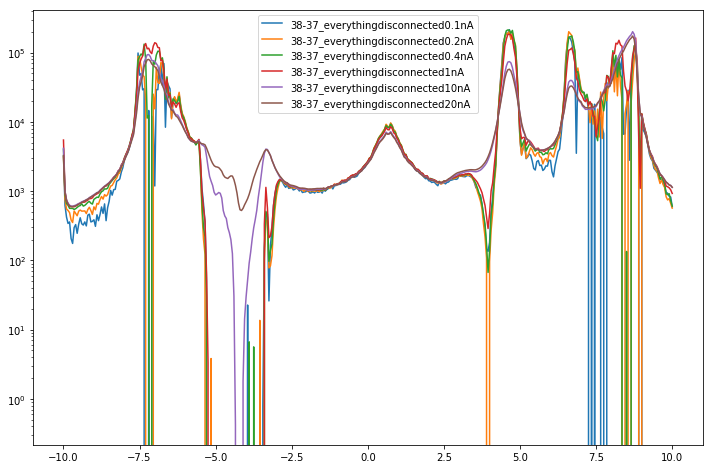

In [173]:
plt.figure(figsize=(12,8))
plt.semilogy(g38_37_11, R38_37_11, label='38-37_everythingdisconnected0.1nA')
plt.semilogy(g38_37_6, R38_37_6, label='38-37_everythingdisconnected0.2nA')
plt.semilogy(g38_37_7, R38_37_7, label='38-37_everythingdisconnected0.4nA')
plt.semilogy(g38_37_8, R38_37_8, label='38-37_everythingdisconnected1nA')
plt.semilogy(g38_37_9, R38_37_9, label='38-37_everythingdisconnected10nA')
plt.semilogy(g38_37_10, R38_37_10, label='38-37_everythingdisconnected20nA')
plt.legend()

In [174]:
offvals = np.linspace(600e-3, -600e-3, 49)
gvals = np.linspace(1, 5, 81)
lockin865.amplitude(0.01)
data56, plot56 = npd.twod_param_sweep(srframe.volt_p1, gvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=2, SetDelay2=2, DataName='M08_Rxx38-37_Rxy38-44_0.1nAdvdi_baseT_electronpocket_b=-0.8mT')
srframe.volt_p1(0)
srframe.volt_p5(0)

Started at 2019-10-10 00:21:02
DataSet:
   location = 'data/2019-10-10/#002_M08_Rxx38-37_Rxy38-44_0.1nAdvdi_baseT_electronpocket_b=-0.8mT_00-21-00'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (81,)
   Setpoint | srframe_volt_p5_set | volt_p5      | (81, 49)
   Measured | lockin865_X         | X            | (81, 49)
   Measured | lockin865_Y         | Y            | (81, 49)
   Measured | lockin830_X         | X            | (81, 49)
   Measured | lockin830_Y         | Y            | (81, 49)
Finished at 2019-10-10 02:43:59


In [175]:
lockin865.amplitude()

0.0099999997765

In [176]:
lockin865.amplitude(0.02)  # 0.2 nA excitation

In [177]:
triton.field()

-0.000802

In [178]:
triton.magnet_swh()

0

Also note that all these are at 0.8 mT, not 0.08 mT

And lockin830 is still connected to the Rxy 38-44

In [181]:
gvals = np.linspace(-10, 10, 401)
data57, plot57 = npd.single_param_sweep(srframe.volt_p1, gvals, 2, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M08_38-37_basetemp_-.08mT_0.2nA')

Started at 2019-10-10 09:02:49
DataSet:
   location = 'data/2019-10-10/#003_M08_38-37_basetemp_-.08mT_0.2nA_09-02-47'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin865_X         | X            | (401,)
   Measured | lockin865_Y         | Y            | (401,)
   Measured | lockin830_X         | X            | (401,)
   Measured | lockin830_Y         | Y            | (401,)
Finished at 2019-10-10 09:17:43


In [182]:
srframe.volt_p1(0)

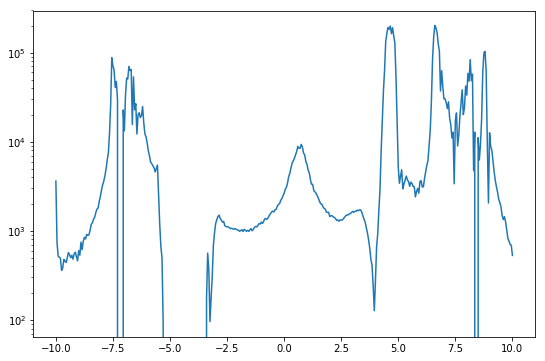

In [185]:
plt.figure(figsize=(9,6))
plt.semilogy(data57.srframe_volt_p1_set, data57.lockin865_X[:]/0.2e-9)

## M08 Temperature sweeps

Connect the temperature sensors and run another sweep at the same amplitude and base temperature

Use lockin865 on 38-37, lockin830 on 39-38

In [187]:
gvals = np.linspace(-10, 10, 401)
data58, plot58 = npd.single_param_sweep(srframe.volt_p1, gvals, 2, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M08_38-37_basetemp_pluggedin_-.8mT_0.2nA')
srframe.volt_p1(0)

Started at 2019-10-10 10:29:49
DataSet:
   location = 'data/2019-10-10/#005_M08_38-37_basetemp_pluggedin_-.8mT_0.2nA_10-29-48'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (401,)
   Measured | lockin865_X         | X            | (401,)
   Measured | lockin865_Y         | Y            | (401,)
   Measured | lockin830_X         | X            | (401,)
   Measured | lockin830_Y         | Y            | (401,)
Finished at 2019-10-10 10:44:43


In [189]:
triton.pid_setpoint(0.05)
triton.pid_mode(1)

In [194]:
triton.pid_range(10)  # in mA. This range should work up to ~1K, I think

In [195]:
triton.pid_setpoint(0.05)

In [205]:
gvals = np.linspace(-10, 10, 401)  # stopped at 1K
Tvals = np.linspace(0.05, 1.5, 30)
data59, plot59 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=150, SetDelay2=2, Param2_SetBetween=0, DataName='M08_-.8mT_0.2nA_T-bgtwod')

Started at 2019-10-10 11:08:53
DataSet:
   location = 'data/2019-10-10/#006_M08_-.8mT_0.2nA_T-bgtwod_11-08-50'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (30,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (30, 401)
   Measured | lockin865_X             | X            | (30, 401)
   Measured | lockin865_Y             | Y            | (30, 401)
   Measured | lockin830_X             | X            | (30, 401)
   Measured | lockin830_Y             | Y            | (30, 401)
Finished at 2019-10-10 16:55:56
Keyboard Interrupt


In [206]:
srframe.volt_p1(0)

From 1K, go to the stable point around 3K?, turn off turbo pump, switch V9 off, V4 on. Switch to using the cernox (#5) for temperature control. Do the sweep to 10K.

In [207]:
triton.pid_range(31.6)
triton.pid_setpoint(2)

In [208]:
triton.pid_range(100)

In [209]:
triton.write('SET:DEV:TURB1:PUMP:SIG:STATE:OFF')

In [210]:
triton.write('SET:DEV:V9:VALV:SIG:STATE:CLOSE')
triton.write('SET:DEV:V4:VALV:SIG:STATE:OPEN')

In [218]:
triton.pid_mode(0)

In [236]:
triton.MC_cernox_temp_enable(1)
triton.MC_temp_enable(0)

In [229]:
triton.pid_range(31.6)

Changing the pid control channel from here doesn't work. You must change it manually on the fridge computer

In [240]:
triton.pid_control_channel(5)
triton.pid_mode(1)
triton.pid_setpoint(2)
time.sleep(3)
triton.pid_range(100)

In [241]:
gvals = np.linspace(-10, 10, 401)
Tvals = np.linspace(2, 10, 81)
data60, plot60 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=180, SetDelay2=2, Param2_SetBetween=0, DataName='M08_-.8mT_0.2nA_T-bgtwod_3to10K')
srframe.volt_p1(0)

Started at 2019-10-10 17:35:53
DataSet:
   location = 'data/2019-10-10/#007_M08_-.8mT_0.2nA_T-bgtwod_3to10K_17-35-51'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (81,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (81, 401)
   Measured | lockin865_X             | X            | (81, 401)
   Measured | lockin865_Y             | Y            | (81, 401)
   Measured | lockin830_X             | X            | (81, 401)
   Measured | lockin830_Y             | Y            | (81, 401)
Finished at 2019-10-11 08:55:22


KeyboardInterrupt: 

In [243]:
data60 = qc.load_data('data/2019-10-10/#007_M08_-.8mT_0.2nA_T-bgtwod_3to10K_17-35-51')

In [244]:
# stopped at 7.1K
data60.triton_pid_setpoint_set

DataArray[81]: triton_pid_setpoint_set
array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2,
       3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5,
       4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8,
       5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan])

In [250]:
gvals = np.linspace(-10, 10, 401)
Tvals = np.linspace(7.2, 10, 15)
data61, plot61 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=180, SetDelay2=2, Param2_SetBetween=0, DataName='M08_-.8mT_0.2nA_T-bgtwod_7p2to10K')
srframe.volt_p1(0)

Started at 2019-10-11 08:58:34
DataSet:
   location = 'data/2019-10-11/#001_M08_-.8mT_0.2nA_T-bgtwod_7p2to10K_08-58-32'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (15,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (15, 401)
   Measured | lockin865_X             | X            | (15, 401)
   Measured | lockin865_Y             | Y            | (15, 401)
   Measured | lockin830_X             | X            | (15, 401)
   Measured | lockin830_Y             | Y            | (15, 401)
Finished at 2019-10-11 13:24:28


Then flip back to the low-temperature mode (V9 on, V4 off, MC RuOx - #8 - as control sensor, turbo on). Wait for it to hit 2K. Then turn on the turbo to bring it to base temp.

In [251]:
triton.pid_setpoint(1)
triton.pid_range(10)
triton.pid_mode(0)

In [265]:
triton.write('SET:DEV:V9:VALV:SIG:STATE:OPEN')
triton.write('SET:DEV:V4:VALV:SIG:STATE:CLOSE')

In [253]:
while triton.MC_cernox_temp() > 2:
    print(triton.MC_cernox_temp())
    time.sleep(90)

In [254]:
triton.write('SET:DEV:TURB1:PUMP:SIG:STATE:ON')
triton.MC_cernox_temp_enable(0)
triton.MC_temp_enable(1)

In [ ]:
# Can use this later if we want to do the temp sweep between 1 and 2K
gvals = np.linspace(-10, 10, 401)
Tvals = np.linspace(1, 2, 21)
data_, plot_ = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=180, SetDelay2=2, Param2_SetBetween=0, DataName='M08_-.8mT_0.2nA_T-bgtwod_1to2K')

In [257]:
triton.MC_temp_enable(1)

In [275]:
triton.read_pressures()

P1:  654.679
P2:  663.18
P3:  5.3
P4:  1.19
P5:  94.6425
POVC:  0.0003


In [273]:
triton.read_pumps()

Turbo: 1,  speed: 0.0 Hz
KNF: 1
Forepump: 1


In [276]:
triton.read_temps()


MC - on:  1.3472 K
MC_cernox - off:  1.54284 K
still - off:  0.733706 K
cold_plate - off:  0.0650397 K
magnet - off:  4.24373 K
PT2h - off:  3.49526 K
PT2p - off:  3.7111 K
PT1h - off:  45.6463 K
PT1p - off:  61.0569 K


## Go back to device M05.

Yiran: follow the steps below

Check that it's at base temperature before you disconnect cables and run the last step

Current electrodes 24-14, measure Rxx: 21-20 with lockin865.

Measure 20-19 (also Rxx on the slightly larger angle) with lockin830.

Leave the excitation at 0.2 nA, (100 MOhm resistor, 20 mV excitation)

Unplug the two temperature sensor cables (not the magnet), and turn on the magnet VRM software. Then run the two blocks below (you don't have to wait for the first one to finish before running the second block)

In [4]:
lockin865.amplitude(0.02)

In [8]:
# first turn on the magnet VRM software

triton.magnet_sweeprate(0.1)
triton.magnet_POC(0)
triton.magnet_swh(1)

Wait 5 min for the switch to warm


In [7]:
gvals = np.linspace(-13, 17, 301)
bvals = np.linspace(0, 8, 161)
dat62, plot62 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=7, SetDelay2=2.2, Param2_SetBetween=0, DataName='M05_21-20and20-19_LandauFan')

Started at 2019-10-13 11:47:01
Please wait 130.00600000000003 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for

In [8]:
srframe.volt_p1(0)
srframe.volt_p5(0)

In [9]:
gvals = np.linspace(17, -13, 451)
bvals = np.linspace(0, 8, 161)
data63, plot63 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=1.3, SetDelay2=1.3, DataName='M05_21-20and20-19_LandauFan_attempt3')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-10-13 14:15:11
Please wait 310.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.988 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.988 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operatin

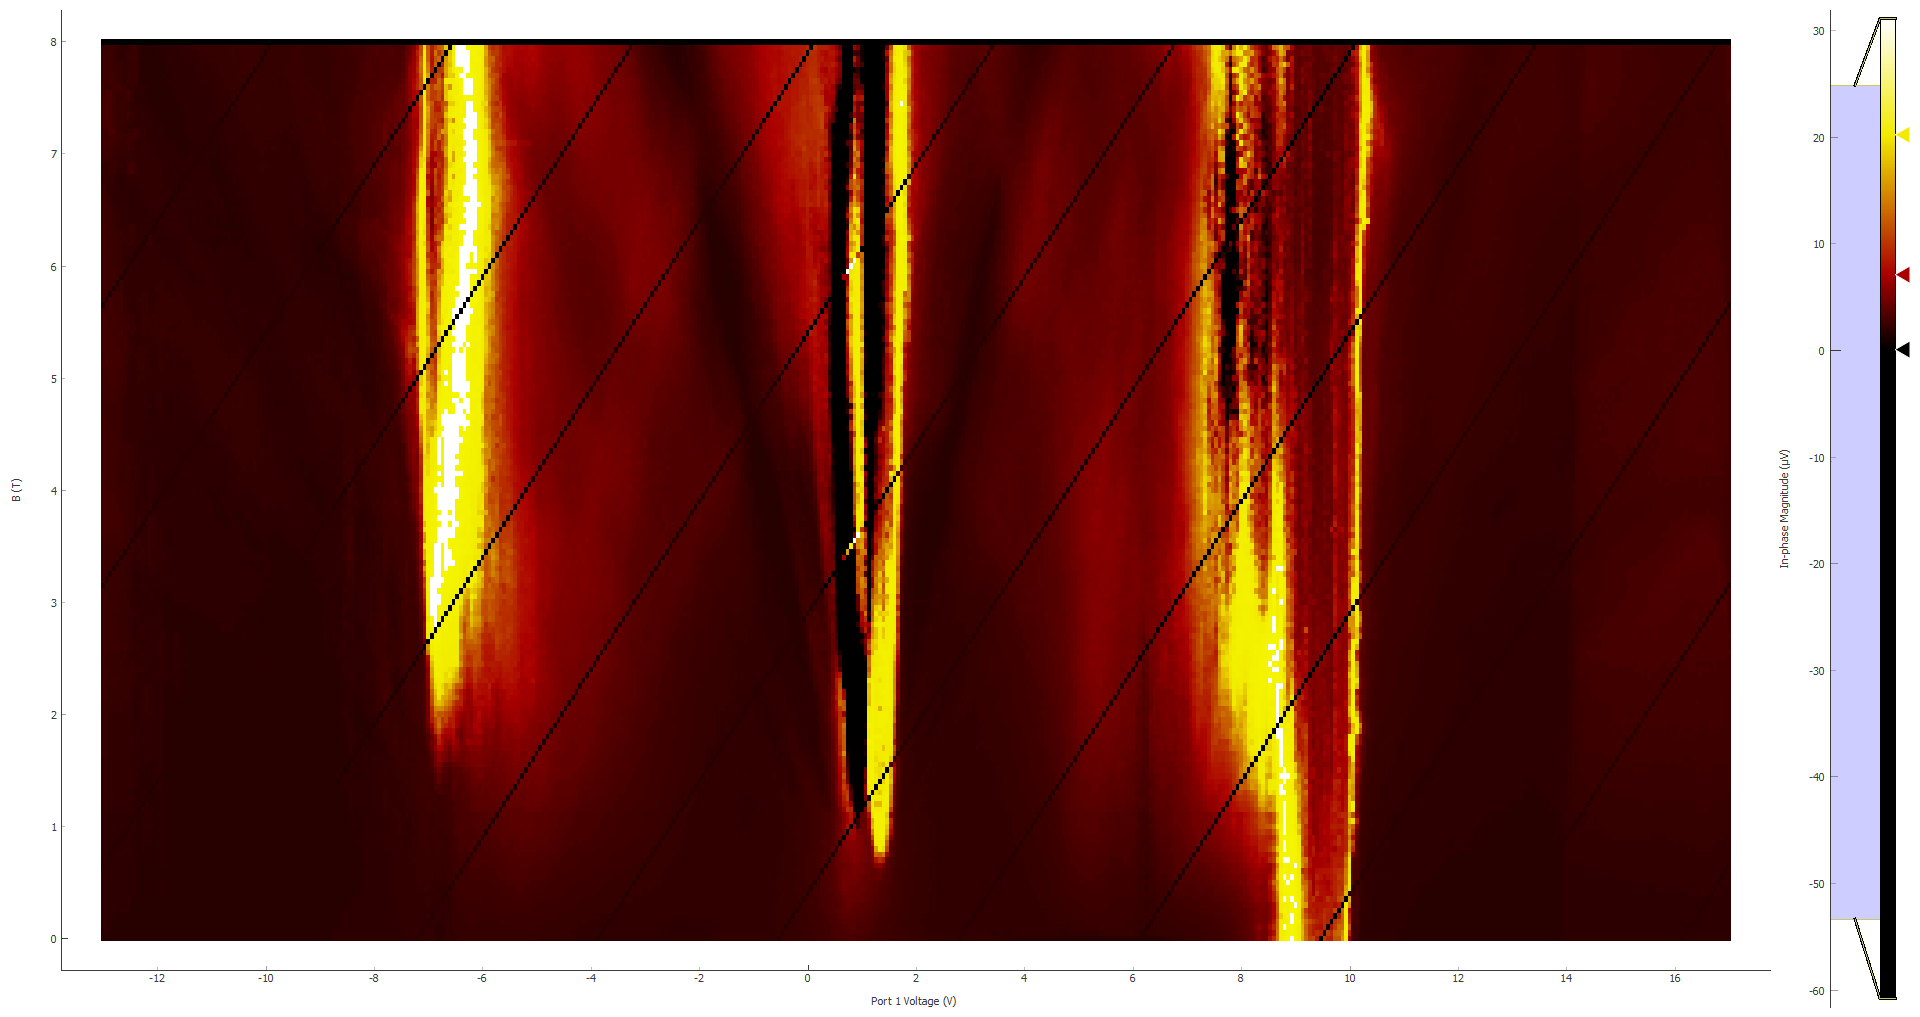

In [10]:
plot63[0]  # cut off without the 8T datapoint because the magnet temperature was "too high". Changed it and now it should work for the next sweep

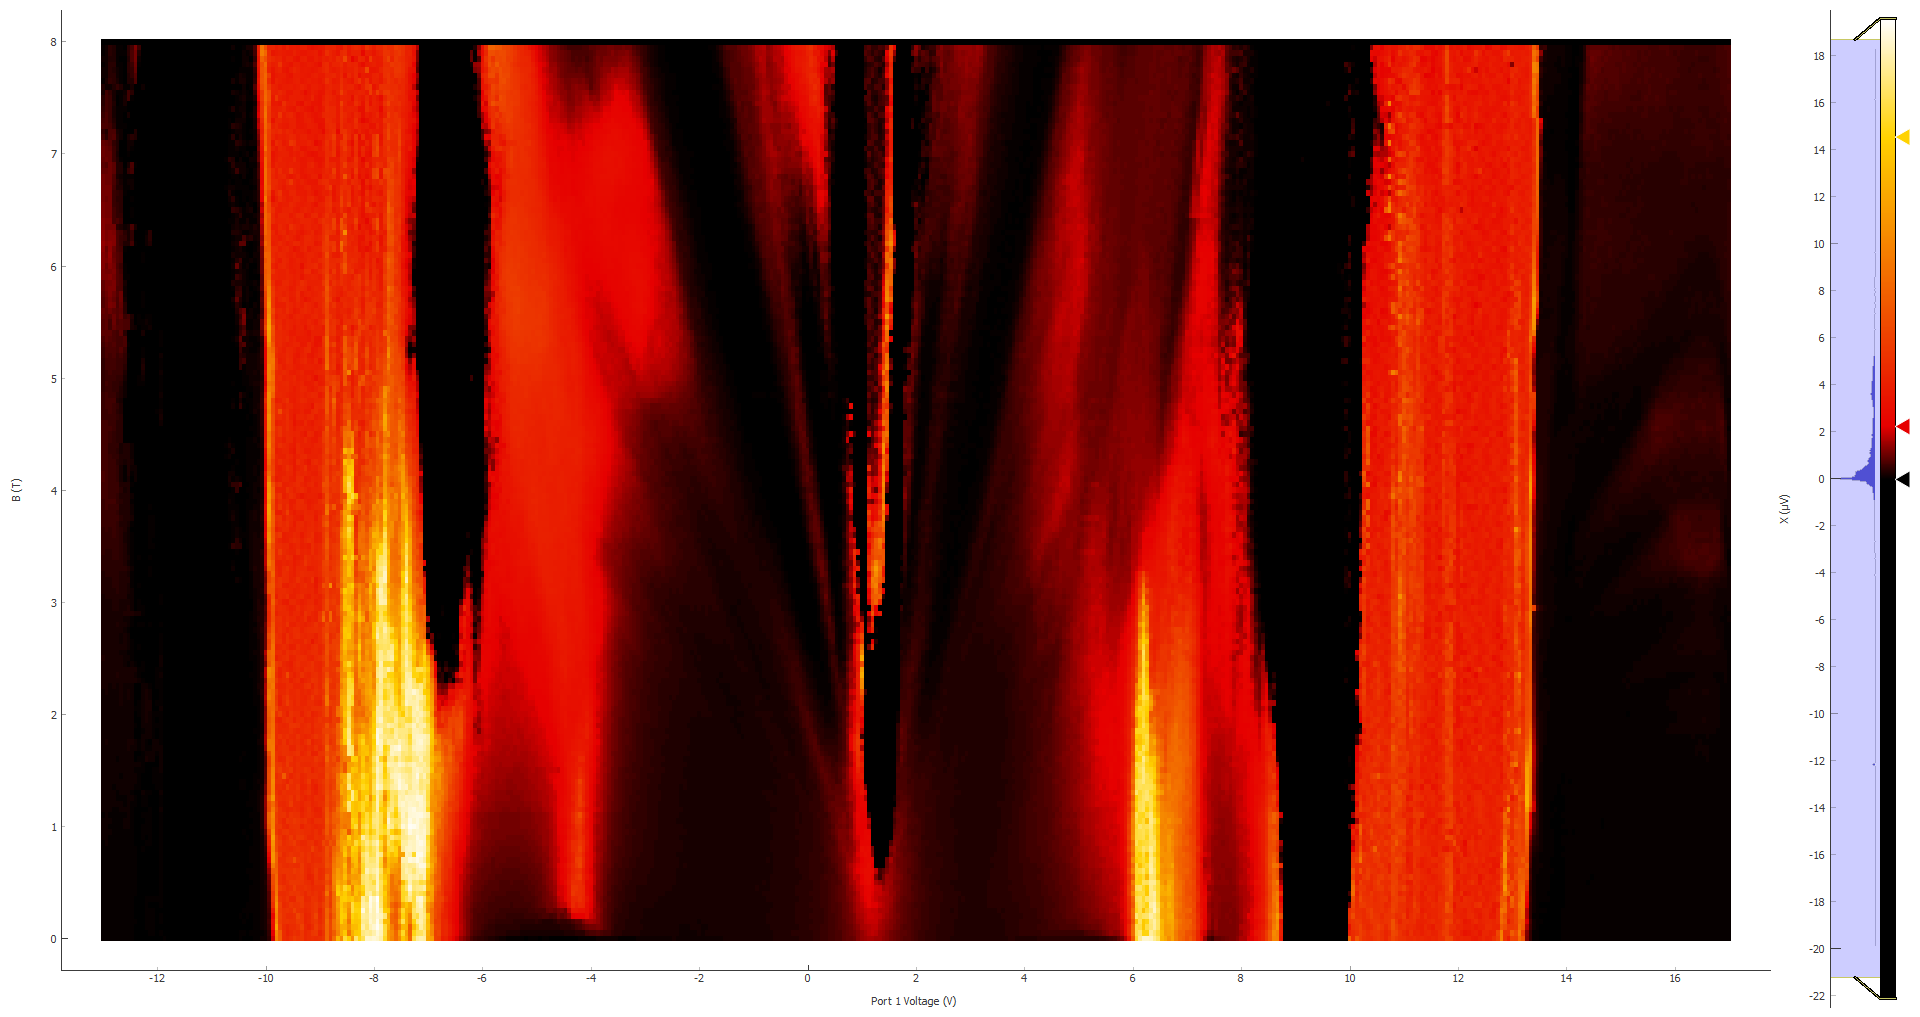

In [11]:
plot63[2]

In [4]:
gvals = np.linspace(17, -13, 451)
bvals = np.linspace(8, 5.5, 51)
data64, plot64 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=1.3, SetDelay2=1.3, DataName='M05_21-20and20-19_LandauFan_downsweepto5.5T')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-10-14 23:36:06
Are you sure you want to use the magnet? [y/n]: y
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.988 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.018 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds f

In [5]:
triton.field()

5.499997

In [8]:
gvals = np.linspace(17, -13, 451)
bvals = np.linspace(5, 0.5, 10)
data65, plot65 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=1.3, SetDelay2=1.3, DataName='M05_21-20and20-19_LandauFan_downsweepto0p5T')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-10-15 10:39:33
Please wait 310.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 310.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 310.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 309.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 310.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 310.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 309.988 seconds for the field sweep, plus the time required for operating the switch...
Please wait 310.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 310.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 310.006 seconds for the field sweep, plus the time required f

In [12]:
triton.field(-0.0008)

Sweep time approximately 10.474 seconds


In [22]:
lockin865.amplitude(1)

In [32]:
srframe.volt_p1(5)

In [14]:
gvals = np.linspace(-15, 15, 301)
data66, plot66 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.3, lockin865.X, lockin865.Y, DataName='M08_37-36_basetemp_-.08mT_0.2nA')
srframe.volt_p1(0)
g37_36_1 = data66.srframe_volt_p1_set[:]
R37_36_1 = data66.lockin865_X[:]/0.2e-9

Started at 2019-10-15 14:43:57
DataSet:
   location = 'data/2019-10-15/#002_M08_37-36_basetemp_-.08mT_0.2nA_14-43-56'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
Finished at 2019-10-15 14:51:49


NameError: name 'g38_37_11' is not defined

<Figure size 864x576 with 0 Axes>

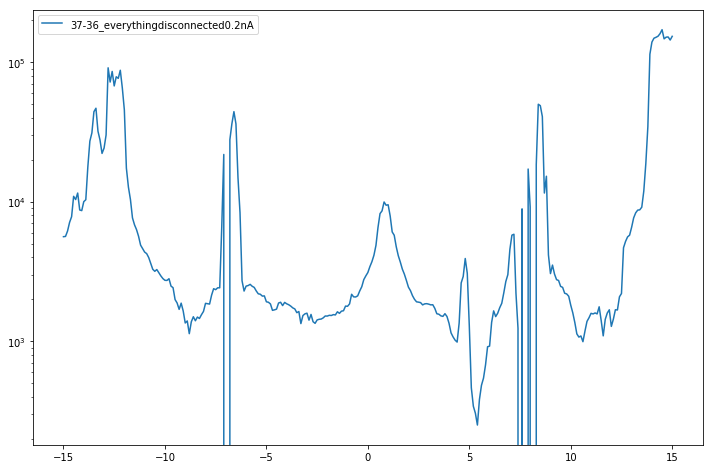

In [15]:
plt.figure(figsize=(12,8))
plt.semilogy(g37_36_1, R37_36_1, label='37-36_everythingdisconnected0.2nA')
plt.legend()

In [20]:
gvals = np.linspace(-15, 15, 301)
data67, plot67 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.3, lockin865.X, lockin865.Y, DataName='M08_37-36_basetemp_-.08mT_1nA')
srframe.volt_p1(0)

Started at 2019-10-15 15:02:26
DataSet:
   location = 'data/2019-10-15/#005_M08_37-36_basetemp_-.08mT_1nA_15-02-25'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
Finished at 2019-10-15 15:10:18


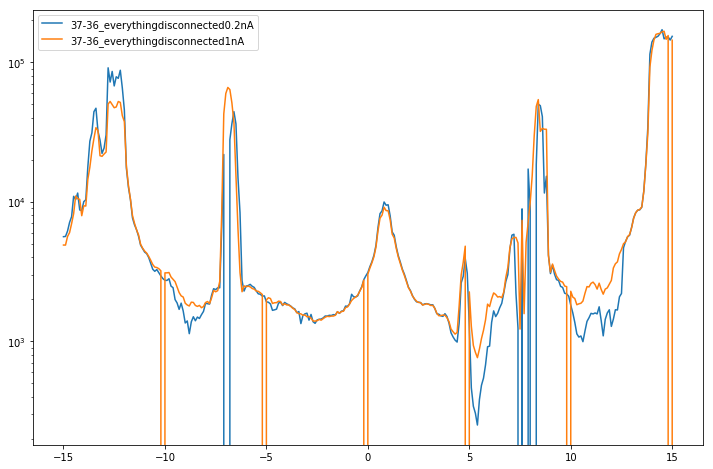

In [21]:
g37_36_2 = data67.srframe_volt_p1_set[:]
R37_36_2 = data67.lockin865_X[:]/1e-9
plt.figure(figsize=(12,8))
plt.semilogy(g37_36_1, R37_36_1, label='37-36_everythingdisconnected0.2nA')
plt.semilogy(g37_36_2, R37_36_2, label='37-36_everythingdisconnected1nA')
plt.legend()

In [24]:
gvals = np.linspace(-15, 15, 301)
data68, plot68 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.5, lockin865.X, lockin865.Y, DataName='M08_37-36_basetemp_-.08mT_10nA')
srframe.volt_p1(0)

Started at 2019-10-15 15:13:49
DataSet:
   location = 'data/2019-10-15/#006_M08_37-36_basetemp_-.08mT_10nA_15-13-48'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
Finished at 2019-10-15 15:22:42


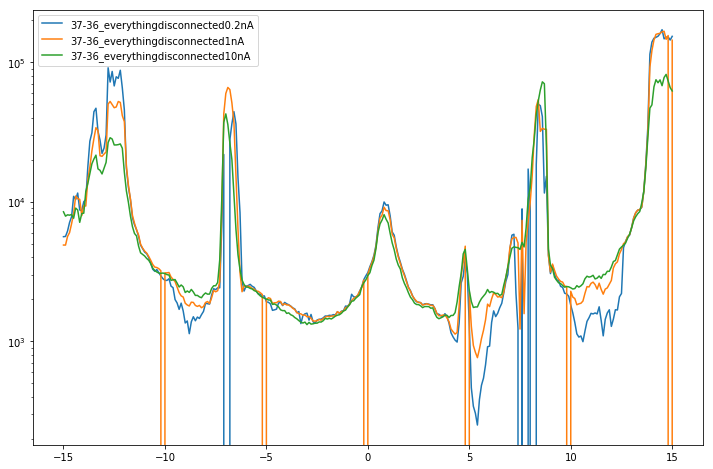

In [25]:
g37_36_3 = data68.srframe_volt_p1_set[:]
R37_36_3 = data68.lockin865_X[:]/10e-9
plt.figure(figsize=(12,8))
plt.semilogy(g37_36_1, R37_36_1, label='37-36_everythingdisconnected0.2nA')
plt.semilogy(g37_36_2, R37_36_2, label='37-36_everythingdisconnected1nA')
plt.semilogy(g37_36_3, R37_36_3, label='37-36_everythingdisconnected10nA')
plt.legend()

In [27]:
gvals = np.linspace(-15, 15, 301)
data69, plot69 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.5, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M08_37-36_basetemp_-.08mT_0.2nA_magnetdisconnected')
srframe.volt_p1(0)

Started at 2019-10-15 15:34:20
DataSet:
   location = 'data/2019-10-15/#007_M08_37-36_basetemp_-.08mT_0.2nA_magnetdisconnected_15-34-18'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
   Measured | lockin830_X         | X            | (301,)
   Measured | lockin830_Y         | Y            | (301,)
Finished at 2019-10-15 15:43:41


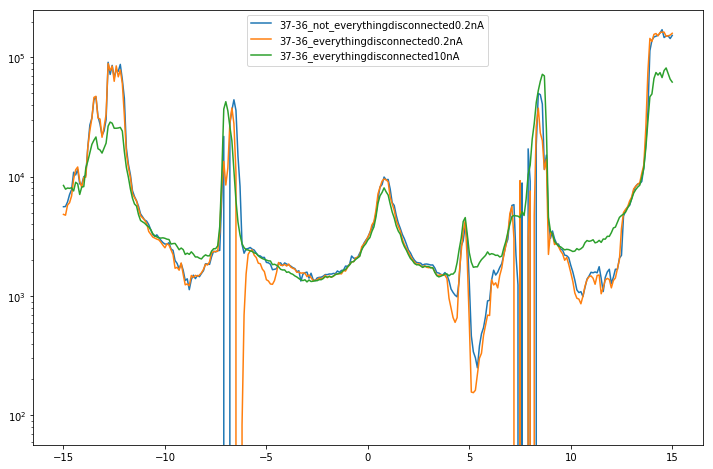

In [30]:
g37_36_4 = data69.srframe_volt_p1_set[:]
R37_36_4 = data69.lockin865_X[:]/0.2e-9
plt.figure(figsize=(12,8))
plt.semilogy(g37_36_1, R37_36_1, label='37-36_not_everythingdisconnected0.2nA')
plt.semilogy(g37_36_4, R37_36_4, label='37-36_everythingdisconnected0.2nA')
#plt.semilogy(g37_36_2, R37_36_2, label='37-36_everythingdisconnected1nA')
plt.semilogy(g37_36_3, R37_36_3, label='37-36_everythingdisconnected10nA')
plt.legend()

In [33]:
offvals = np.linspace(-2, 2, 101)
data70, plot70 = npd.single_param_sweep(srframe.volt_p5, offvals, 2, lockin865.X, lockin865.Y, DataName='M08_37-36_basetemp_0T_dvdi')

Started at 2019-10-15 15:50:32
DataSet:
   location = 'data/2019-10-15/#008_M08_37-36_basetemp_0T_dvdi_15-50-31'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (101,)
   Measured | lockin865_X         | X            | (101,)
   Measured | lockin865_Y         | Y            | (101,)
Finished at 2019-10-15 15:54:09


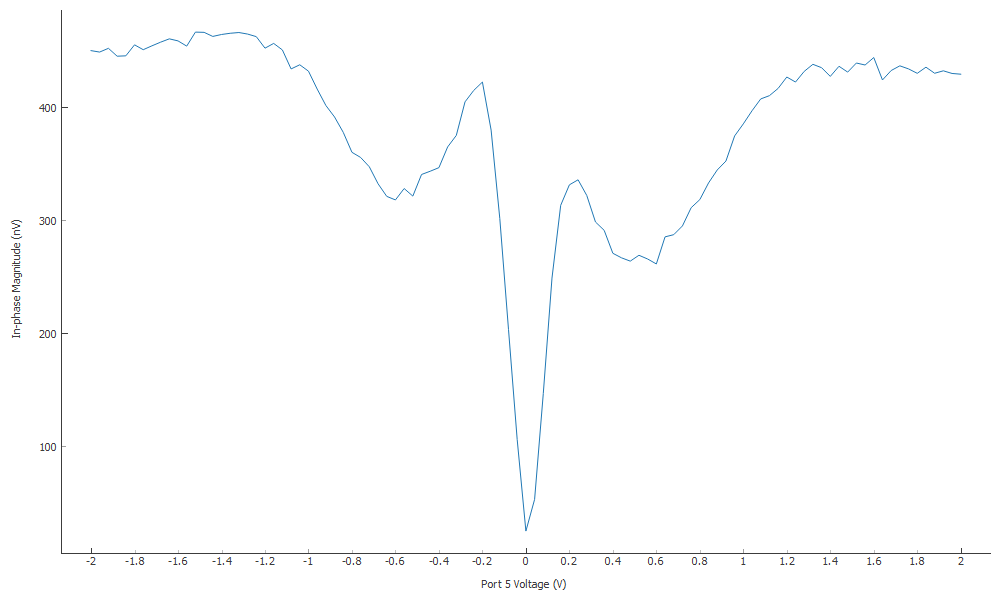

In [34]:
plot70[0]

In [35]:
offvals = np.linspace(-1, 1, 201)
data71, plot71 = npd.single_param_sweep(srframe.volt_p5, offvals, 2, lockin865.X, lockin865.Y, DataName='M08_37-36_basetemp_0T_dvdi_highres')

Started at 2019-10-15 15:56:21
DataSet:
   location = 'data/2019-10-15/#009_M08_37-36_basetemp_0T_dvdi_highres_15-56-20'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2019-10-15 16:03:31


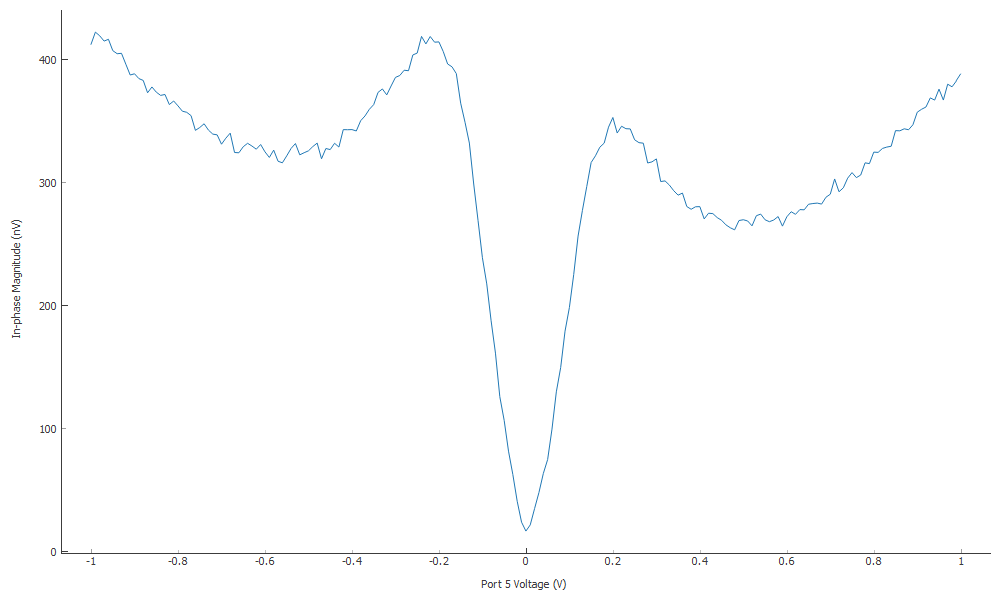

In [36]:
plot71[0]

In [45]:
triton.field(-0.0008)

Sweep time approximately 2410.0060000000003 seconds


In [42]:
gvals = np.linspace(3, 11, 81)
bvals = np.linspace(4, 8, 41)
data72, plot72 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=1, SetDelay2=1, DataName='M08_37-36and46-47_LandauFan_4-8Tquick')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-10-15 16:22:02
Please wait 1134.796 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating t

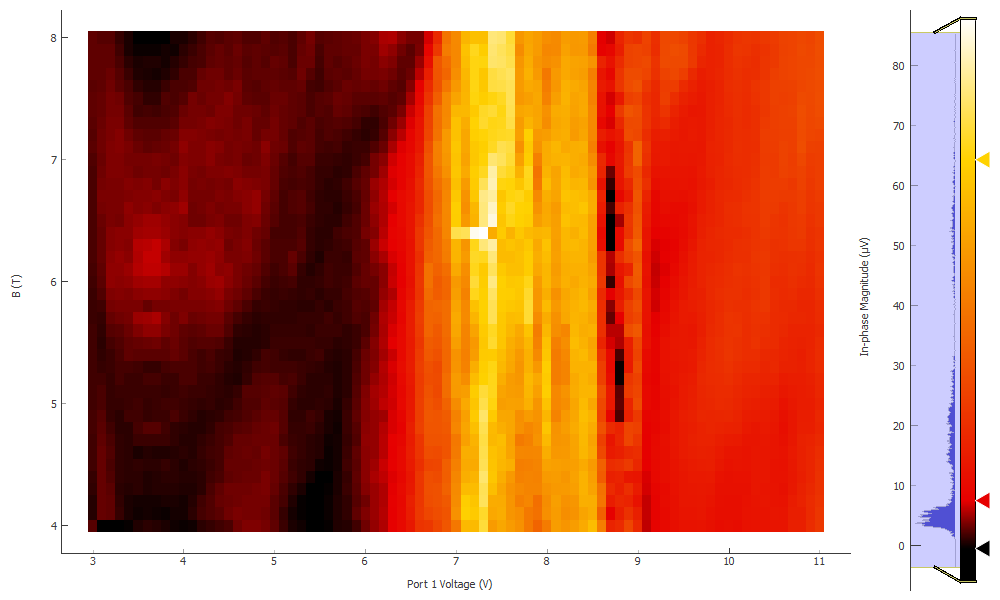

In [137]:
plot72[0]

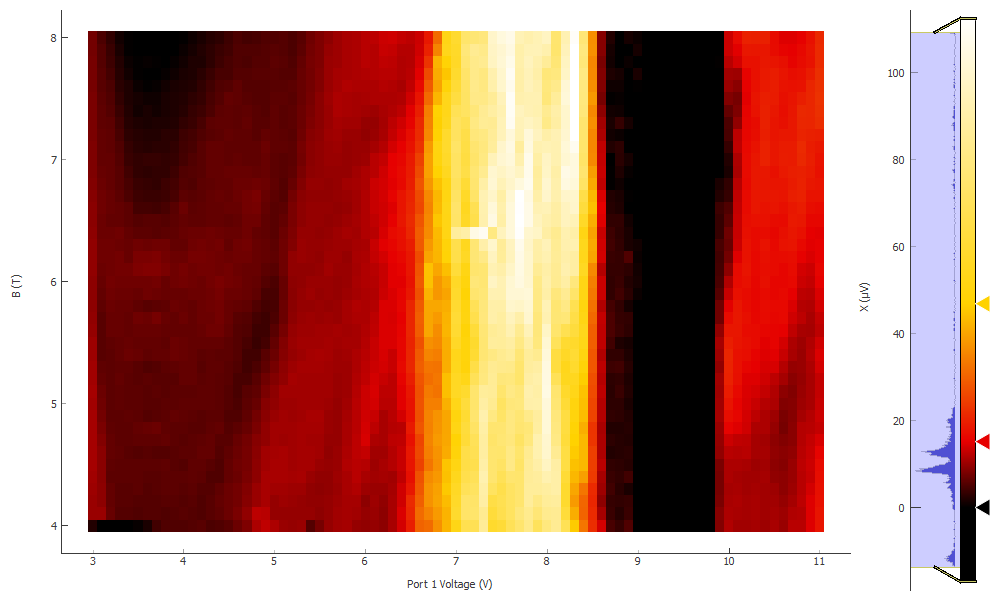

In [138]:
plot72[2]

In [50]:
srframe.volt_p1(-15)

In [51]:
gvals = np.linspace(-15, 15, 301)
data73, plot73 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.3, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M08_37-36and46-47_basetemp_-.08mT_0.4nA')
srframe.volt_p1(0)

Started at 2019-10-15 19:19:46
DataSet:
   location = 'data/2019-10-15/#014_M08_37-36and46-47_basetemp_-.08mT_0.4nA_19-19-44'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
   Measured | lockin830_X         | X            | (301,)
   Measured | lockin830_Y         | Y            | (301,)
Finished at 2019-10-15 19:28:17


In [58]:
srframe.volt_p1(-15)

In [53]:
gvals = np.linspace(-15, 15, 301)
data74, plot74 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.5, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M08_36-35and47-48_basetemp_-.08mT_0.4nA')
srframe.volt_p1(0)

Started at 2019-10-15 19:30:46
DataSet:
   location = 'data/2019-10-15/#015_M08_36-35and47-48_basetemp_-.08mT_0.4nA_19-30-44'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
   Measured | lockin830_X         | X            | (301,)
   Measured | lockin830_Y         | Y            | (301,)
Finished at 2019-10-15 19:39:58


In [55]:
lockin865.amplitude(0.5)

In [66]:
srframe.volt_p1(15)

In [63]:
gvals = np.linspace(15, -15, 301)
data76, plot76 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.5, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M08_38-37and44-46_basetemp_-.08mT_0.4nA')

Started at 2019-10-15 20:00:11
DataSet:
   location = 'data/2019-10-15/#021_M08_38-37and44-46_basetemp_-.08mT_0.4nA_20-00-09'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
   Measured | lockin830_X         | X            | (301,)
   Measured | lockin830_Y         | Y            | (301,)
Finished at 2019-10-15 20:00:21
Keyboard Interrupt


In [67]:
gvals = np.linspace(15, -15, 301)
data77, plot77 = npd.single_param_sweep(srframe.volt_p1, gvals, 1.5, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, DataName='M08_39-38_rxy38-44_basetemp_-.08mT_0.4nA')

Started at 2019-10-15 20:06:26
DataSet:
   location = 'data/2019-10-15/#023_M08_39-38_rxy38-44_basetemp_-.08mT_0.4nA_20-06-24'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (301,)
   Measured | lockin865_X         | X            | (301,)
   Measured | lockin865_Y         | Y            | (301,)
   Measured | lockin830_X         | X            | (301,)
   Measured | lockin830_Y         | Y            | (301,)
Finished at 2019-10-15 20:15:38


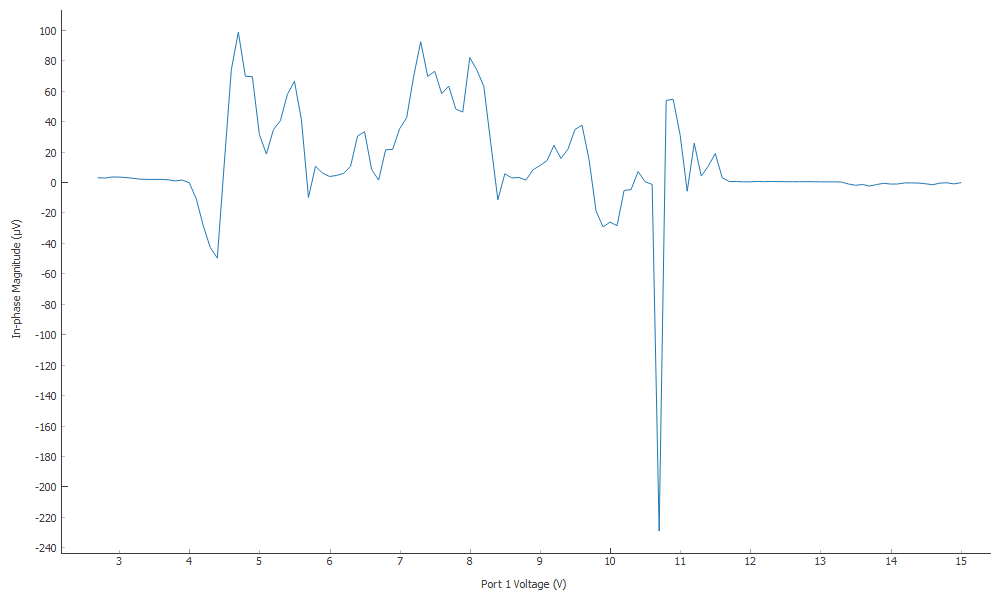

In [65]:
plot77[0]

In [68]:
triton.magnet_swh(1)

Wait 5 min for the switch to warm


M05: 

20-19 on lockin865

19-16 on lockin830

excitation amplitude: 1 nA (since we're just taking the fan and not focusing on SC)

In [69]:
srframe.volt_p5(0)
srframe.volt_p1(0)

In [71]:
triton.field(0)

Sweep time approximately 10.228 seconds


In [74]:
gvals = np.linspace(17, -13, 301)  # ignore the dataname here. The lockin configuration is above
bvals = np.linspace(0, 8, 81)
data78, plot78 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=1.3, SetDelay2=1.3, DataName='M05_21-20and19-16_LandauFan')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2019-10-15 23:13:28
Please wait 10.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating t

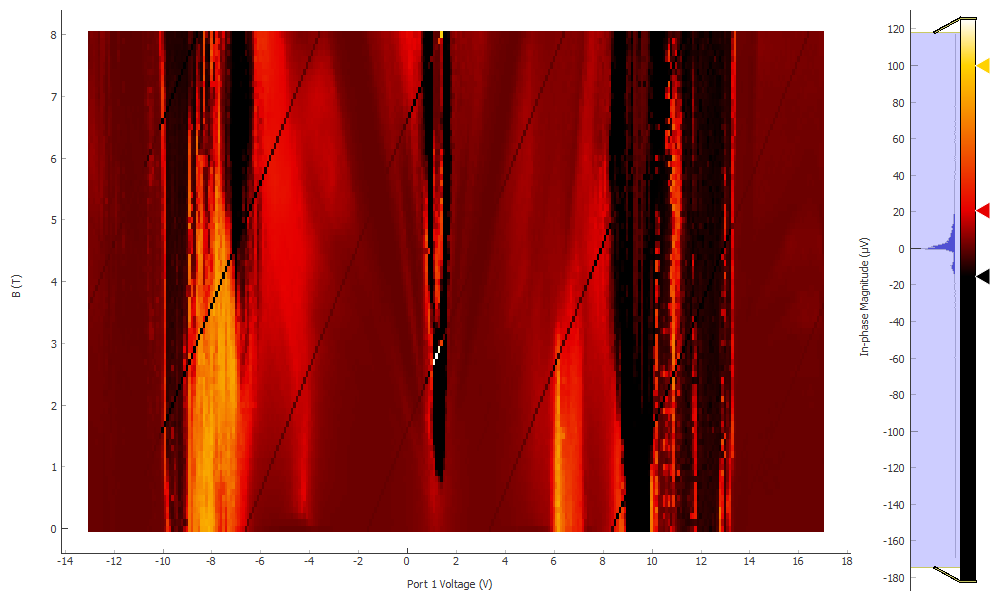

In [76]:
plot78[0]

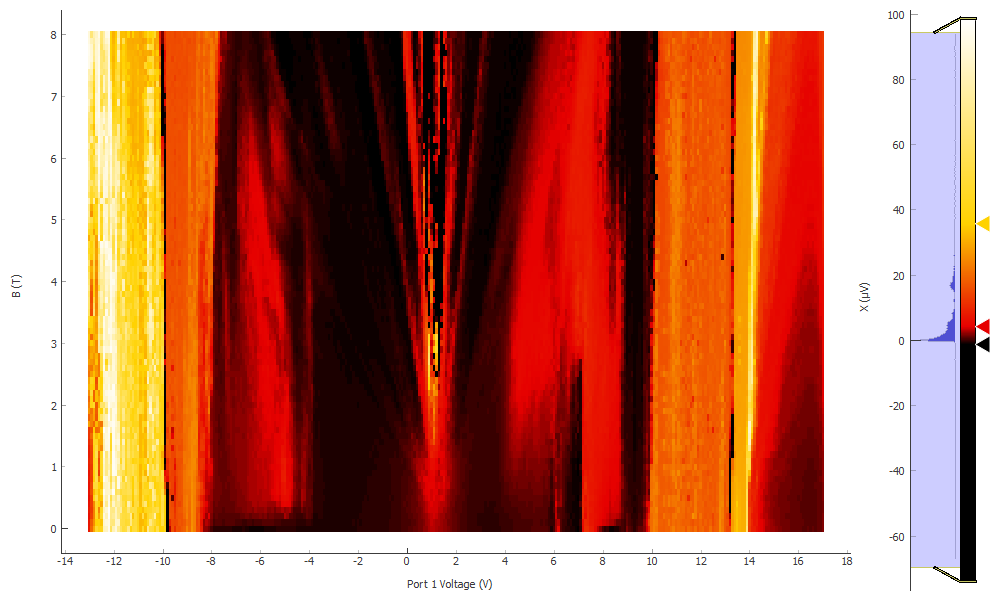

In [77]:
plot78[2]

In [73]:
triton.magnet_POC(0)

In [78]:
triton.field(0)

Sweep time approximately 2410.0060000000003 seconds


Back to device M08 for the 1-2K sweep

Electrodes 43-42 for current. Measure 38-37 on lockin865. Disconnect lockin830, just for a bit, to try to avoid black lines.

0.2 nA excitation.

Reconnect the temperature cables.

In [79]:
triton.field_set_stable(-0.0008)
triton.swh(0)

The magnet temperature is 4.6722 K. Waiting for it to drop < 4.6005 K
The magnet temperature is 4.6618 K. Waiting for it to drop < 4.6005 K
The magnet temperature is 4.6533 K. Waiting for it to drop < 4.6005 K
The magnet temperature is 4.6456 K. Waiting for it to drop < 4.6005 K
The magnet temperature is 4.6384 K. Waiting for it to drop < 4.6005 K
The magnet temperature is 4.6319 K. Waiting for it to drop < 4.6005 K
The magnet temperature is 4.6261 K. Waiting for it to drop < 4.6005 K
The magnet temperature is 4.6209 K. Waiting for it to drop < 4.6005 K
The magnet temperature is 4.6167 K. Waiting for it to drop < 4.6005 K
The magnet temperature is 4.6130 K. Waiting for it to drop < 4.6005 K
The magnet temperature is 4.6111 K. Waiting for it to drop < 4.6005 K
The magnet temperature is 4.6079 K. Waiting for it to drop < 4.6005 K
The magnet temperature is 4.6056 K. Waiting for it to drop < 4.6005 K
The magnet temperature is 4.6037 K. Waiting for it to drop < 4.6005 K
The magnet temperatu

AttributeError: 'Triton' object and its delegates have no attribute 'swh'

In [81]:
triton.pid_setpoint(0.2)

In [87]:
triton.pid_mode(0)

In [85]:
triton.pid_control_channel(8)

In [88]:
triton.pid_mode(1)

In [94]:
triton.pid_range(31.6)

In [97]:
triton.pid_setpoint(1)

In [99]:

gvals = np.linspace(-10, 10, 401)
Tvals = np.linspace(1.1, 1.9, 9)
data79, plot79 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=180, SetDelay2=2, Param2_SetBetween=0, DataName='M08_-.8mT_0.2nA_T-bgtwod_1to2K')

Started at 2019-10-16 13:36:11
DataSet:
   location = 'data/2019-10-16/#002_M08_-.8mT_0.2nA_T-bgtwod_1to2K_13-36-09'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (9,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (9, 401)
   Measured | lockin865_X             | X            | (9, 401)
   Measured | lockin865_Y             | Y            | (9, 401)
   Measured | lockin830_X             | X            | (9, 401)
   Measured | lockin830_Y             | Y            | (9, 401)
Finished at 2019-10-16 14:29:21
Keyboard Interrupt


Shut down early (right after 1.3 K was measured) since the lockin865 was still showing those black spots. Trying to turn off and back on the lockin865

(already tried disconnecting the trigger cable to lockin830, disconnecting the shields from lockin865, changing the frequency from 23 to 23.307 Hz, jiggling the usb and gpib connectors, the grounding braids, and the electronics rack. None of that worked)

In [100]:
srframe.volt_p1(0)

In [101]:
lockin865.close()

In [102]:
npd.instrumentinitialize.triton_instrs('lockin865')

Connected to: Stanford_Research_Systems SR865A (serial:003538, firmware:V1.51) in 0.06s


In [116]:
lockin865.X()

5.8298803651e-07

Looks like the lockin amplifier just needed a restart

In [117]:
gvals = np.linspace(-10, 10, 401)  # 1.4-1.5K. That's it for this one since the pid range ran out
Tvals = np.linspace(1.4, 1.9, 6)
data80, plot80 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=180, SetDelay2=2, Param2_SetBetween=0, DataName='M08_-.8mT_0.2nA_T-bgtwod_1p4to1p9K')
srframe.volt_p1(0)

Started at 2019-10-16 14:36:36
DataSet:
   location = 'data/2019-10-16/#003_M08_-.8mT_0.2nA_T-bgtwod_1p4to1p9K_14-36-33'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (6,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (6, 401)
   Measured | lockin865_X             | X            | (6, 401)
   Measured | lockin865_Y             | Y            | (6, 401)
   Measured | lockin830_X             | X            | (6, 401)
   Measured | lockin830_Y             | Y            | (6, 401)
Finished at 2019-10-16 15:19:03
Keyboard Interrupt


In [118]:
#1.6 to 2K needed a higher pid current range
triton.pid_range(100)

In [119]:
gvals = np.linspace(-10, 10, 401) # 1.6-1.9K
Tvals = np.linspace(1.6, 1.9, 4)
data81, plot81 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=180, SetDelay2=2, Param2_SetBetween=0, DataName='M08_-.8mT_0.2nA_T-bgtwod_1p6to1p9K')
srframe.volt_p1(0)

Started at 2019-10-16 15:21:12
DataSet:
   location = 'data/2019-10-16/#004_M08_-.8mT_0.2nA_T-bgtwod_1p6to1p9K_15-21-10'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (4,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (4, 401)
   Measured | lockin865_X             | X            | (4, 401)
   Measured | lockin865_Y             | Y            | (4, 401)
   Measured | lockin830_X             | X            | (4, 401)
   Measured | lockin830_Y             | Y            | (4, 401)
Finished at 2019-10-16 16:32:13


In [123]:
triton.pid_range(31.6)

In [124]:
triton.pid_setpoint(1.1)

In [125]:
gvals = np.linspace(-10, 10, 401) # go back and get 1.1-1.3 without the black spots
Tvals = np.linspace(1.1, 1.3, 3)
data82, plot82 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, SetDelay1=180, SetDelay2=2, Param2_SetBetween=0, DataName='M08_-.8mT_0.2nA_T-bgtwod_1p1to1p3K')
srframe.volt_p1(0)

Started at 2019-10-16 16:39:58
DataSet:
   location = 'data/2019-10-16/#005_M08_-.8mT_0.2nA_T-bgtwod_1p1to1p3K_16-39-57'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (3,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (3, 401)
   Measured | lockin865_X             | X            | (3, 401)
   Measured | lockin865_Y             | Y            | (3, 401)
Finished at 2019-10-16 17:32:30


In [134]:
triton.pid_setpoint(0.1)

In [135]:
triton.pid_range(10)

In [136]:
triton.pid_mode(0)

# Now back to measuring device M08 Rxx, Rxy. Do up and down field sweeps around thte strange 1/4 filling

Rxx on 38-37 (lockin865)

Rxy on 38-44 (lockin830)

0.2 nA, time constants on the lockins: 100 ms

In [140]:
triton.MC_temp()

0.413087

In [144]:
triton.magnet_swh()

1

In [146]:
triton.magnet_POC(0)

In [148]:
triton.magnet_sweeprate(0.1)

In [149]:
gvals = np.linspace(0, 7.5, 151)
bvals = np.linspace(0, 8, 161)

data83, plot83 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=4, SetDelay2=0.8, Param2_SetBetween=0, DataName='M08_Rxx38-37_Rxy38-44_0p2nA_0to7p5Vbg_fieldup', ZParam=[lockin865.X, lockin830.X])

Started at 2019-10-16 22:09:33
Please wait 10.462 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.988 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.988 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.988 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.988 seconds for the field sweep, plus the time required for opera

In [150]:
gvals = np.linspace(0, 7.5, 151)
bvals = np.linspace(8, 0, 161)

data84, plot84 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=4, SetDelay2=0.8, Param2_SetBetween=0, DataName='M08_Rxx38-37_Rxy38-44_0p2nA_0to7p5Vbg_fielddown', ZParam=[lockin865.X, lockin830.X])

Started at 2019-10-17 06:57:03
Please wait 10.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating

In [151]:
gvals = np.linspace(3, 5.5, 51)
bvals = np.linspace(0, -8, 161)

data85, plot85 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=4, SetDelay2=1, Param2_SetBetween=0, DataName='M08_Rxx38-37_Rxy38-44_0p2nA_0to7p5Vbg_fielddown_narrow', ZParam=[lockin865.X, lockin830.X])

Started at 2019-10-17 15:45:51
Please wait 10.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.06 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating th

In [152]:
gvals = np.linspace(3, 7, 81)
bvals = np.linspace(-8, 0, 161)

data86, plot86 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=4, SetDelay2=1, Param2_SetBetween=0, DataName='M08_Rxx38-37_Rxy38-44_0p2nA_0to7p5Vbg_fielddown_narrow-8Tto0T', ZParam=[lockin865.X, lockin830.X])

Started at 2019-10-17 22:49:01
Please wait 10.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 39.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 40.0 seconds for the field sweep, plus the time required for operating t

In [153]:
gvals = np.linspace(3, 7, 81)
bvals = np.linspace(0, 5, 51)

data87, plot87 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p1, gvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, SetDelay1=4, SetDelay2=1, Param2_SetBetween=0, DataName='M08_Rxx38-37_Rxy38-44_0p2nA_0to7p5Vbg_fielddown_narrow-0Tto5T', ZParam=[lockin865.X, lockin830.X])

Started at 2019-10-18 05:41:48
Please wait 10.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 70.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 70.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 69.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 69.982 seconds for the field sweep, plus the time required for operating the switch...
Please wait 69.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 70.0 seconds for the field sweep, plus the time required for operating the switch...
Please wait 70.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 69.994 seconds for the field sweep, plus the time required for operating the switch...
Please wait 70.0 seconds for the field sweep, plus the time required for operating

In [154]:
triton.field(0)

Sweep time approximately 3010.0 seconds


In [155]:
srframe.volt_p1(0)
srframe.volt_p5(0)

In [156]:
srframe.volt_p1()

0.0

In [158]:
triton.field()

7e-06

In [159]:
triton.magnet_swh()

1

In [161]:
triton.close()
srframe.close()
lockin865.close()
lockin830.close()

In [1]:
plot86[0]

NameError: name 'plot86' is not defined